# Unsupervised Learning: Trade & Ahead

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 yellowbrick==1.5 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.2 yellowbrick==1.5 -q --user
# !pip install --upgrade -q jinja2

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# import the data
ta_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock_data.csv')

In [6]:
#creating a copy of the data
trade_stock_df = ta_df.copy()

## Data Overview

- Observations
- Sanity checks

In [7]:
#Print the first few rows of dataset
print(trade_stock_df.head())

  Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77     

In [8]:
#check the shape of the dataset
print(trade_stock_df.shape)
#Print the number of rows and columns in the dataset
print("Number of rows:", trade_stock_df.shape[0])
print("Number of columns:", trade_stock_df.shape[1])

(340, 15)
Number of rows: 340
Number of columns: 15


In [9]:
#check for the duplicate values
print(f'There are {trade_stock_df.duplicated().sum()} duplicate values in the dataset')


There are 0 duplicate values in the dataset


In [10]:
print(trade_stock_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [11]:
# convert all columns with dtype object into category in order to conserve memory
for col in trade_stock_df.columns[trade_stock_df.dtypes=='object']:
    trade_stock_df[col] = trade_stock_df[col].astype('category')

In [12]:
# Check the datatypes of dataset
print(trade_stock_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Ticker Symbol                 340 non-null    category
 1   Security                      340 non-null    category
 2   GICS Sector                   340 non-null    category
 3   GICS Sub Industry             340 non-null    category
 4   Current Price                 340 non-null    float64 
 5   Price Change                  340 non-null    float64 
 6   Volatility                    340 non-null    float64 
 7   ROE                           340 non-null    int64   
 8   Cash Ratio                    340 non-null    int64   
 9   Net Cash Flow                 340 non-null    int64   
 10  Net Income                    340 non-null    int64   
 11  Earnings Per Share            340 non-null    float64 
 12  Estimated Shares Outstanding  340 non-null    floa



*   All the object data types are converted to category
*   There are 4 category types,7 float data type,4 int64 data type columns.
*   Ticker Symbol will be dropped



In [13]:
#check for the missing values
print(trade_stock_df.isnull().sum())

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64


In [14]:
#check for the summary of the dataset
trade_stock_df.describe().T

count          mean           std           min  \
Current Price                 340.0  8.086234e+01  9.805509e+01  4.500000e+00   
Price Change                  340.0  4.078194e+00  1.200634e+01 -4.712969e+01   
Volatility                    340.0  1.525976e+00  5.917984e-01  7.331632e-01   
ROE                           340.0  3.959706e+01  9.654754e+01  1.000000e+00   
Cash Ratio                    340.0  7.002353e+01  9.042133e+01  0.000000e+00   
Net Cash Flow                 340.0  5.553762e+07  1.946365e+09 -1.120800e+10   
Net Income                    340.0  1.494385e+09  3.940150e+09 -2.352800e+10   
Earnings Per Share            340.0  2.776662e+00  6.587779e+00 -6.120000e+01   
Estimated Shares Outstanding  340.0  5.770283e+08  8.458496e+08  2.767216e+07   
P/E Ratio                     340.0  3.261256e+01  4.434873e+01  2.935451e+00   
P/B Ratio                     340.0 -1.718249e+00  1.396691e+01 -7.611908e+01   

                                       25%           50%           75%  \
Current Price                 3.855500e+01  5.970500e+01  9.288000e+01   
Price Change                 -9.394838e-01  4.819505e+00  1.069549e+01   
Volatility                    1.134878e+00  1.385593e+00  1.695549e+00   
ROE                           9.750000e+00  1.500000e+01  2.700000e+01   
Cash Ratio                    1.800000e+01  4.700000e+01  9.900000e+01   
Net Cash Flow                -1.939065e+08  2.098000e+06  1.698108e+08   
Net Income                    3.523012e+08  7.073360e+08  1.899000e+09   
Earnings Per Share            1.557500e+00  2.895000e+00  4.620000e+00   
Estimated Shares Outstanding  1.588482e+08  3.096751e+08  5.731175e+08   
P/E Ratio                     1.504465e+01  2.081988e+01  3.176476e+01   
P/B Ratio                    -4.352056e+00 -1.067170e+00  3.917066e+00   

                                       max  
Current Price                 1.274950e+03  
Price Change                  5.505168e+01  
Volatility                    4.580042e+00  
ROE                           9.170000e+02  
Cash Ratio                    9.580000e+02  
Net Cash Flow                 2.076400e+10  
Net Income                    2.444200e+10  
Earnings Per Share            5.009000e+01  
Estimated Shares Outstanding  6.159292e+09  
P/E Ratio                     5.280391e+02  
P/B Ratio                     1.290646e+02

In [15]:
trade_stock_df.describe(include='category').T

count unique                                 top freq
Ticker Symbol       340    340                                 ZTS    1
Security            340    340                           eBay Inc.    1
GICS Sector         340     11                         Industrials   53
GICS Sub Industry   340    104  Oil & Gas Exploration & Production   16

***Observations:***

 - There are 11 unique GICS Sectors and 104 unique GICS Sub Industries, suggesting a wide representation of the market.
 - Significant range and variability in Current Price, Price Change, and Volatility.
 - ROE and Cash Ratio have a wide range of values.
 - Net Cash Flow, Net Income, P/E Ratio, and P/B Ratio have value significantly highers than 75% suggesting outliers.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate analysis

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={'height_ratios': (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color='orange'
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette='viridis'
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color='green', linestyle='--'
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color='black', linestyle='-'
    )  # Add median to the histogram

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = '{:.1f}%'.format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha='center',
            va='center',
            size=12,
            xytext=(0, 5),
            textcoords='offset points',
        )  # annotate the percentage

    plt.show()  # show the plot

***Analyze the current price***

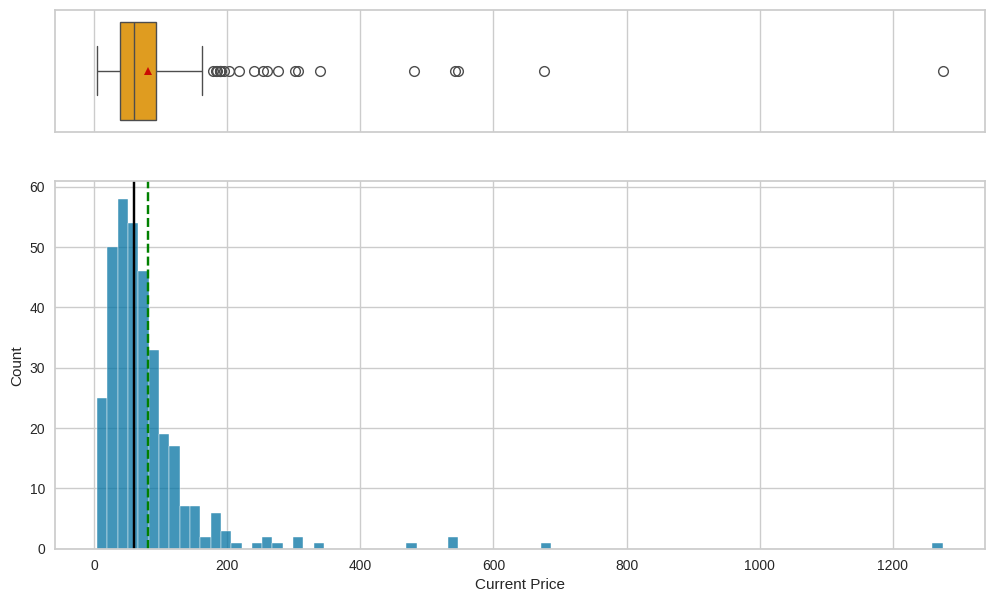

In [18]:
histogram_boxplot(trade_stock_df, 'Current Price')

 - Current price is right skewed, most stocks are priced under 100, but a few high-flyers stretch far beyond $1,200.

***Analyze the price change***

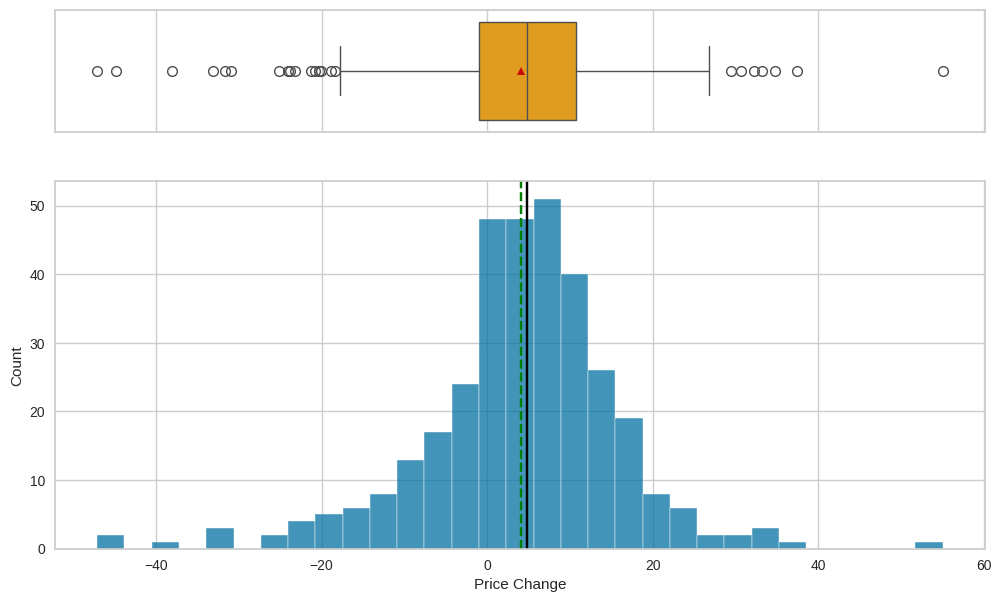

In [19]:
histogram_boxplot(trade_stock_df, 'Price Change')

 - Price changes mostly follow a bell-shaped curve, though outliers on both ends shows few stocks hasextreme ups or downs in its price.

***Analyze the volatility***

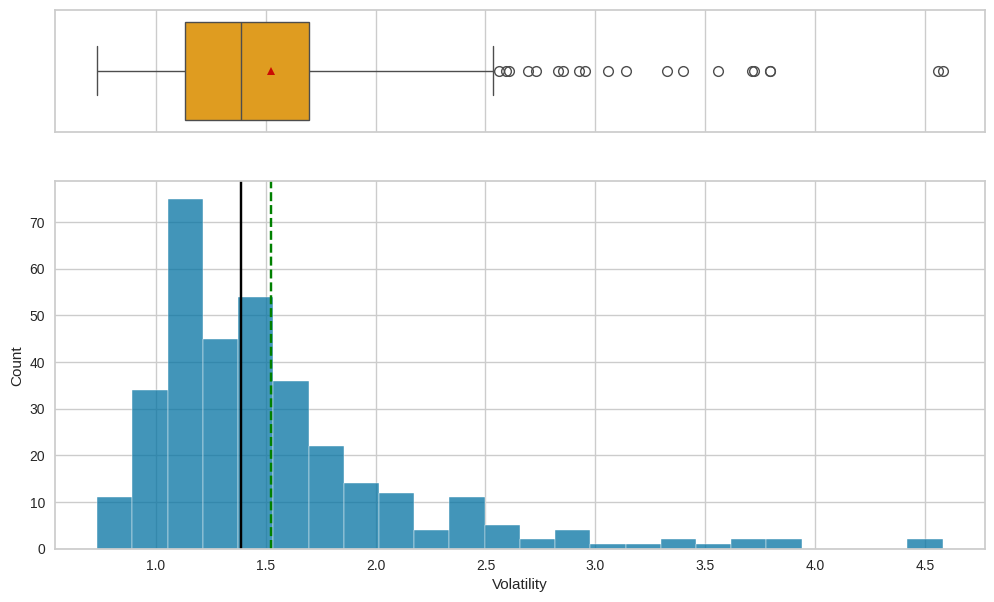

In [20]:
histogram_boxplot(trade_stock_df, 'Volatility')

 - Volatility is moderately right-skewed,most firms show steady performance with volatility under 2

***Analyze the ROE***

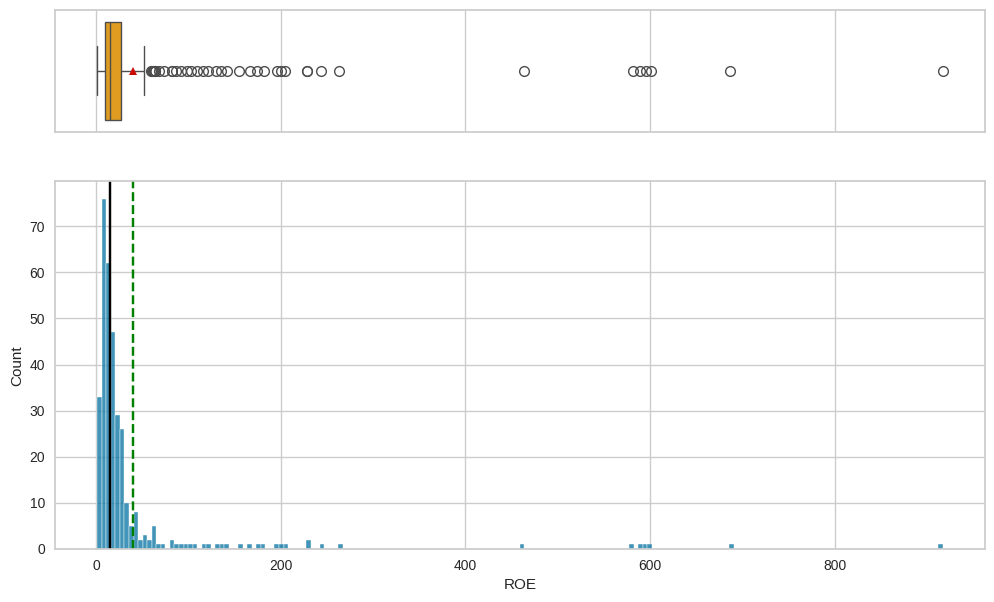

In [21]:
histogram_boxplot(trade_stock_df, 'ROE')

 - Most companies earn moderate returns on equity, while a few outliers pushing the distribution sharply to the right.

***Analyze the cash ratio***

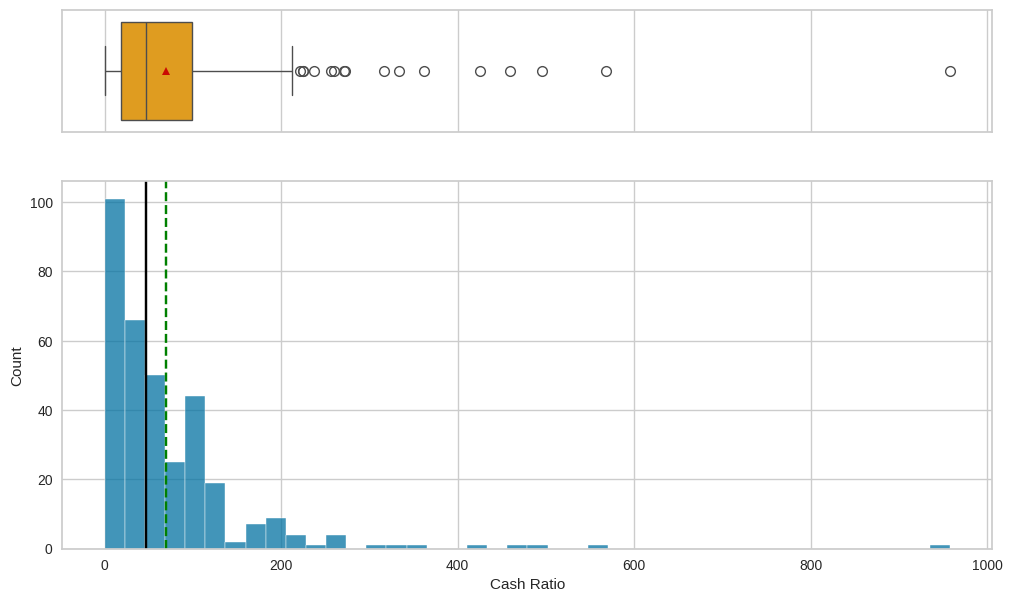

In [22]:
histogram_boxplot(trade_stock_df, 'Cash Ratio')

 - Cash Ratio is right-skewed

***Analyze the net cash flow***

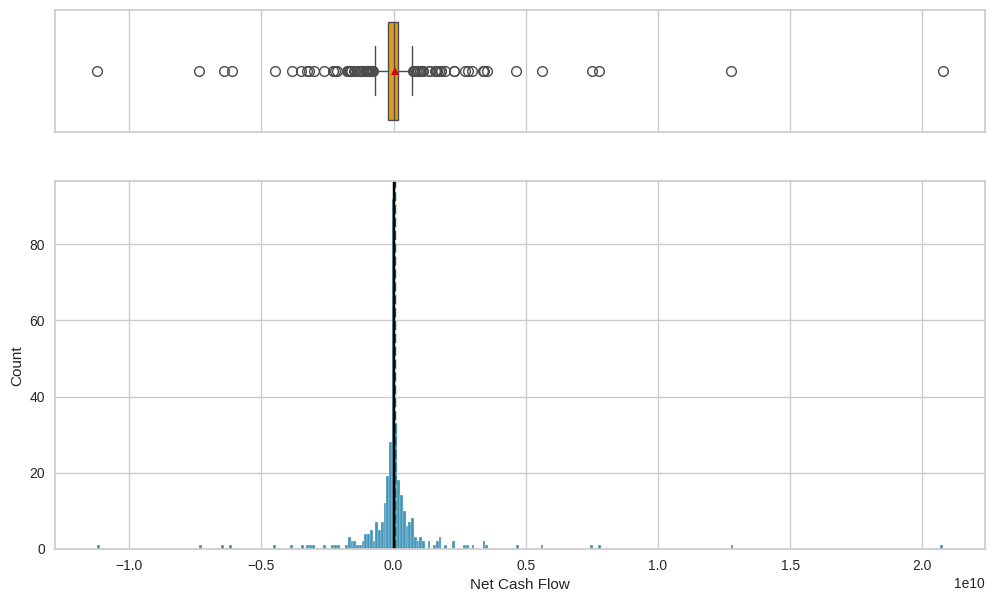

In [23]:
histogram_boxplot(trade_stock_df, 'Net Cash Flow')

 - Most companies have net cash flow close to zero, but a few show very large gains or losses.

***Analyze the net income***

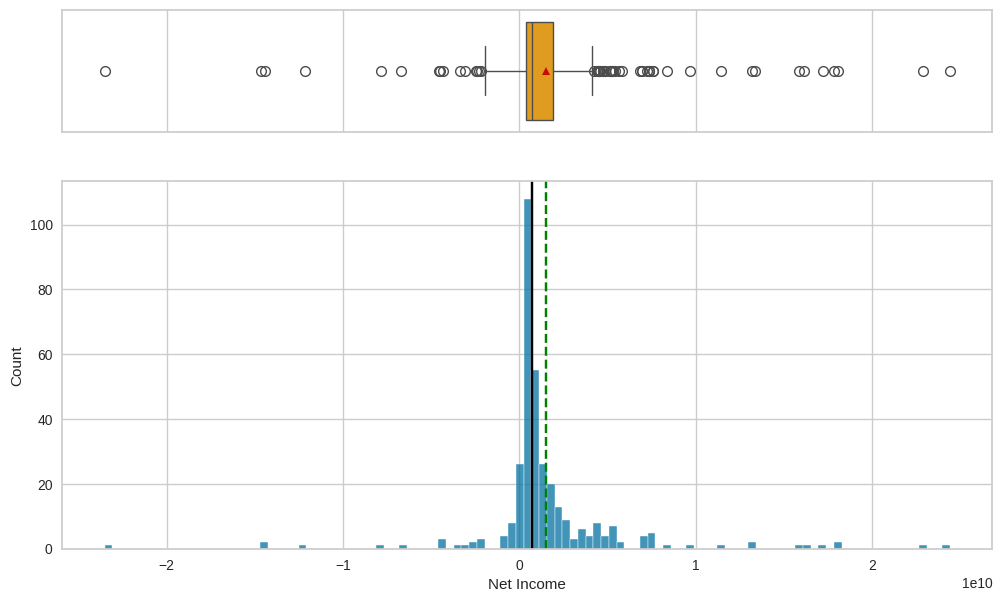

In [24]:
histogram_boxplot(trade_stock_df, 'Net Income')

 - Net Income distribution shows outliers and have similar net income, but a few show very high or very low values that stand out.

***Analyze the earnings per share***

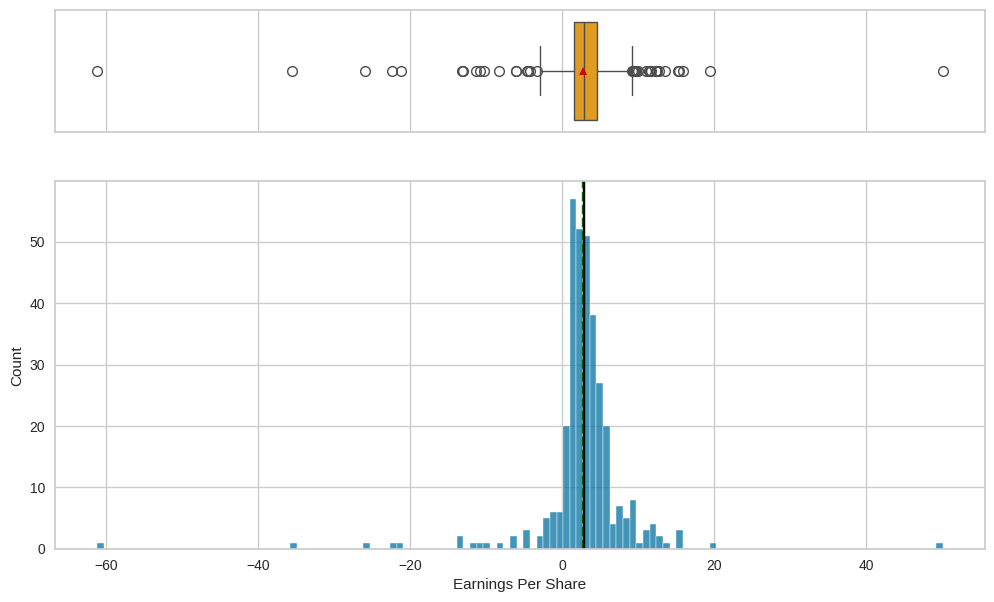

In [25]:
histogram_boxplot(trade_stock_df, 'Earnings Per Share')

 - Earnings per share distribution shows normal but with outliers on both ends could be some companies have very unstable earnings.

***Analyze the estimated shares outstanding***

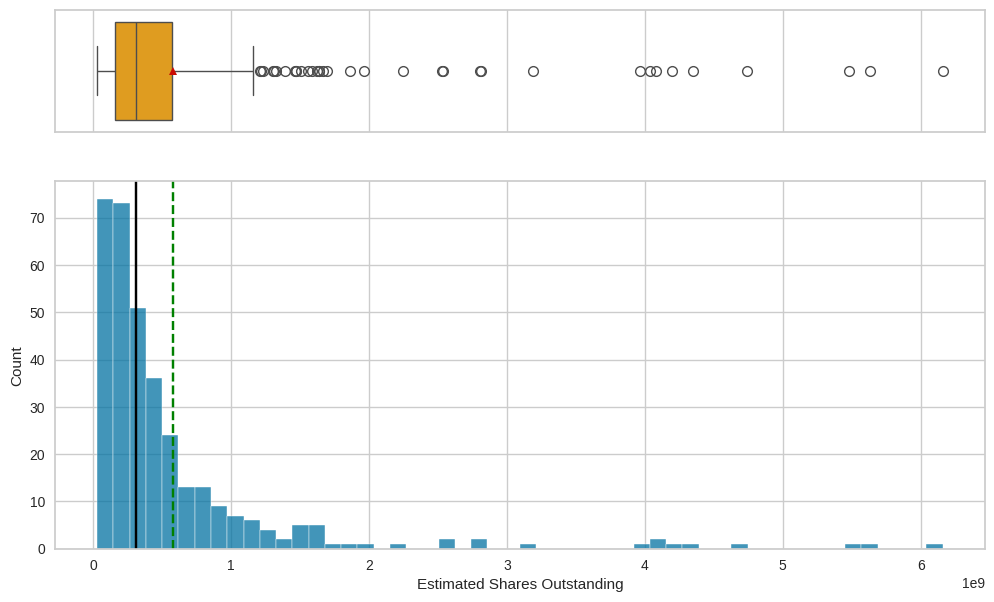

In [26]:
histogram_boxplot(trade_stock_df, 'Estimated Shares Outstanding')

 - Estimated Shares Outstanding distribution is right-skewed with outliers



***Analyze the P/E ratio***

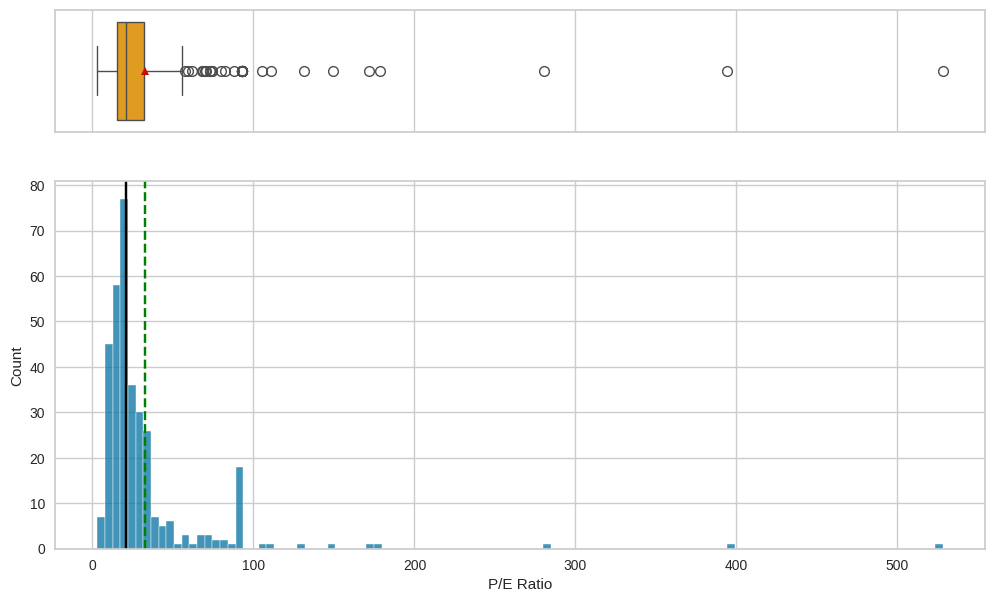

In [27]:
histogram_boxplot(trade_stock_df, 'P/E Ratio')

 - P/E Ratio distribution is right-skewed with outliers

***Analyze the P/B ratio***

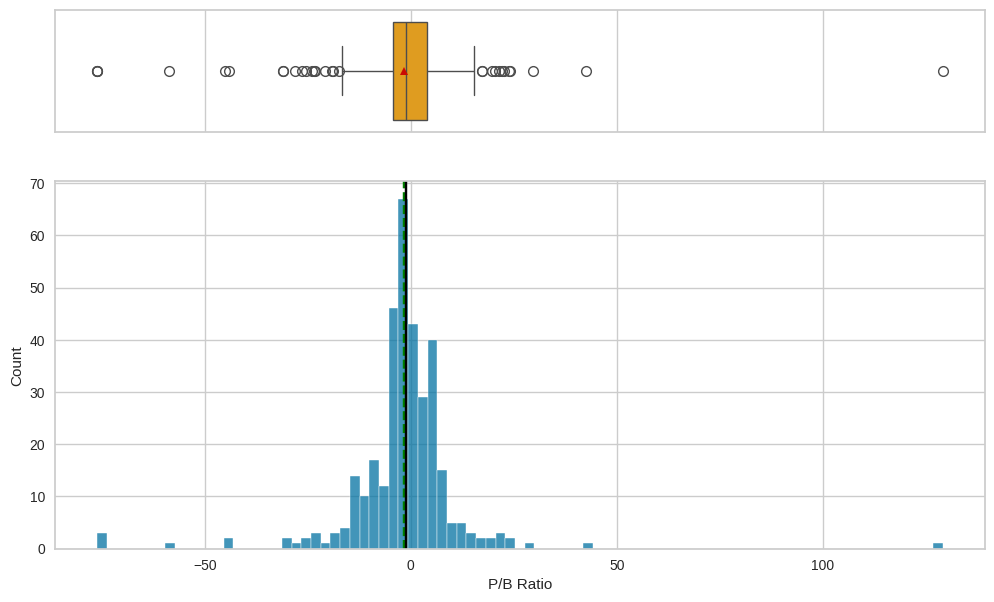

In [28]:
histogram_boxplot(trade_stock_df, 'P/B Ratio')

 - P/B Ratio distribution shows extreme outliers and negative entries indicates possible data inconsistencies.

***Analyze the GICS sector***

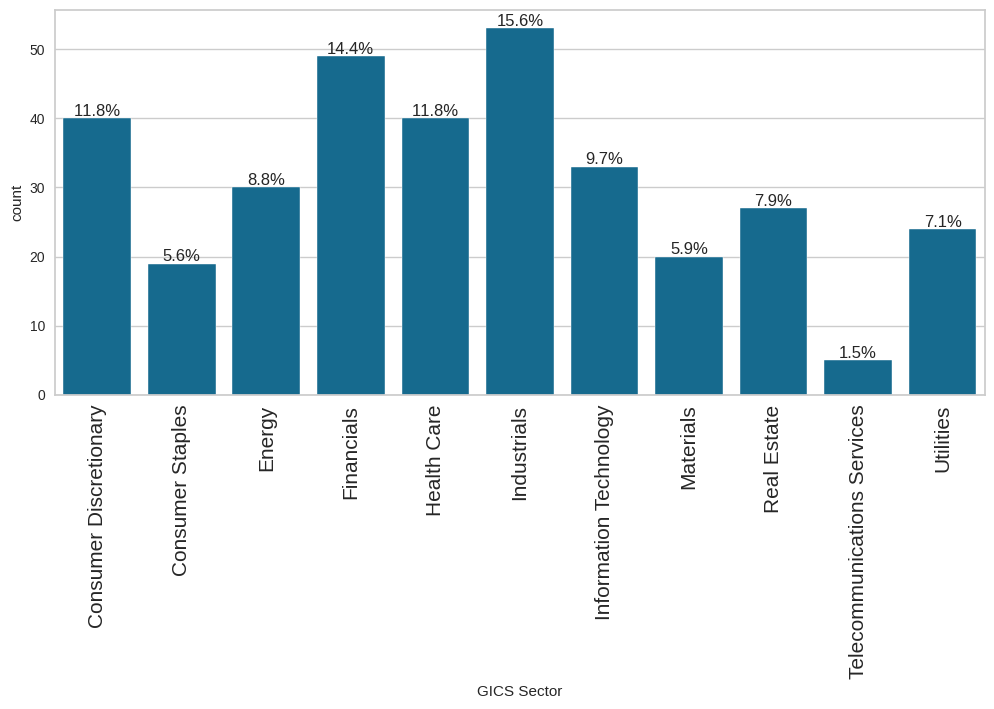

In [29]:
labeled_barplot(trade_stock_df, 'GICS Sector', perc=True)

 - Industrials (15.6%) ,Financials(14.4%) dominate and HealthCare and Consumer Discertionary is 11.8% while Telecommunications Services and Consumer Staples are less than 10%.

In [30]:
#display the sectors with the number of stocks
trade_stock_df["GICS Sector"].value_counts()

GICS Sector
Industrials                    53
Financials                     49
Consumer Discretionary         40
Health Care                    40
Information Technology         33
Energy                         30
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunications Services     5
Name: count, dtype: int64

 - The stocks are drawn from 11 different industrial sectors, with no one sector comprising around 16% of the dataset
 - The top 4 of the 11 sectors (industrials, financials, consumer discretionary, and health care) comprise over half of the total number of stocks

***Analyze the GICS sub industry***

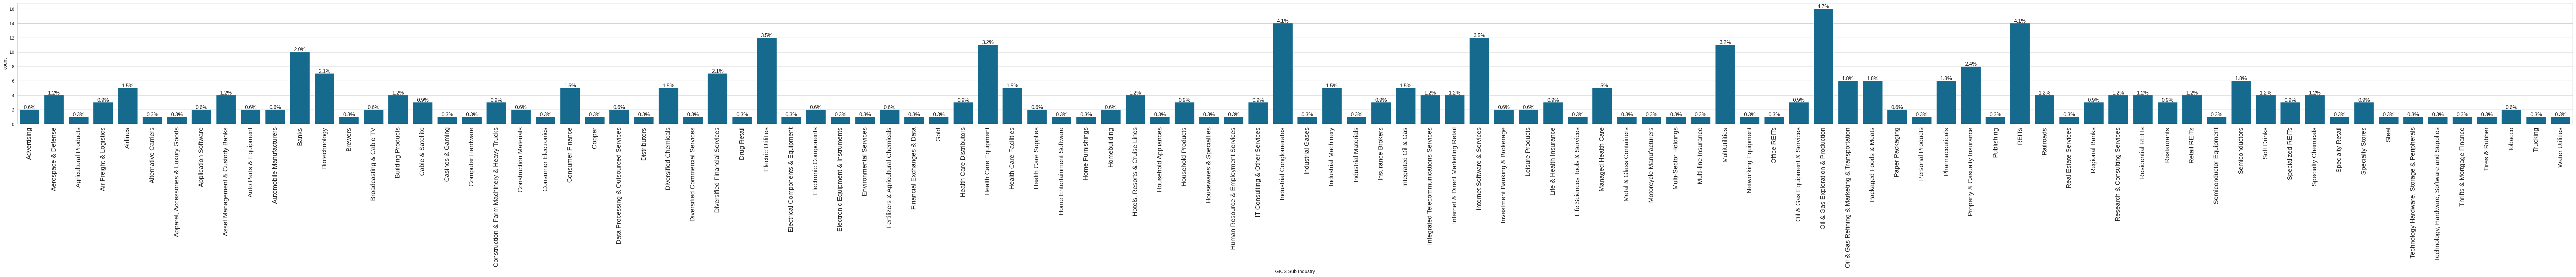

In [31]:
labeled_barplot(trade_stock_df, 'GICS Sub Industry', perc=True)

In [32]:
#display the sub industries with the most number of stocks
trade_stock_df['GICS Sub Industry'].value_counts().head(5)

GICS Sub Industry
Oil & Gas Exploration & Production    16
Industrial Conglomerates              14
REITs                                 14
Electric Utilities                    12
Internet Software & Services          12
Name: count, dtype: int64

 - The dataset spans 104 subindustries, with no single group exceeding 16 stocks.
 - These observations indicate that the 340 stocks held within the dataset are highly diversified across sectors and subindustries.

### Bivariate Analysis

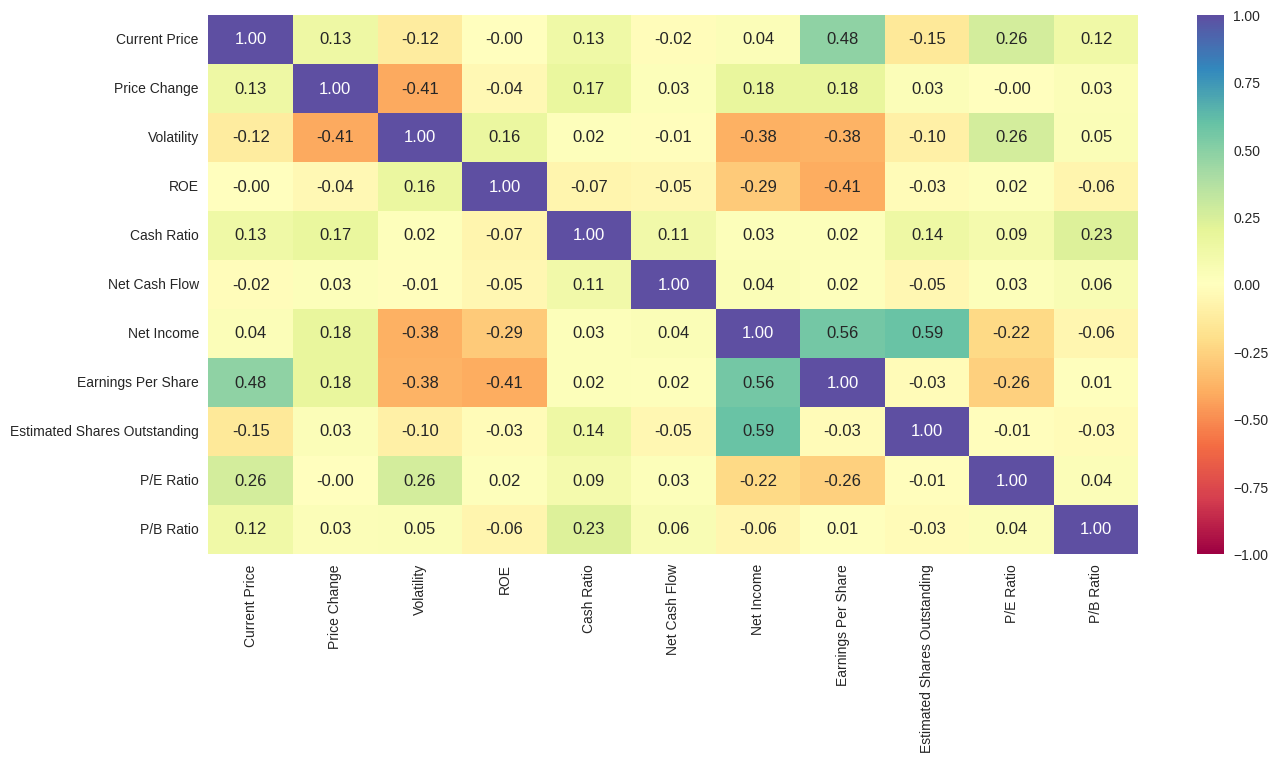

In [33]:
# check for correlation
plt.figure(figsize=(15, 7))
# Select only numeric columns for correlation matrix
numeric_df = trade_stock_df.select_dtypes(include=[np.number])
sns.heatmap(
    numeric_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

***Observation:***

  - Several variables are moderately correlated (+/- .40) with one another
     - Volatility is negatively correlated with price change, i.e., as a stock becomes more volatile, its price is likely dropping.
     - Net income is negatively correlayed with volatility, i.e. as a company generates higher net income its price is likely less volatile
     - Net income is also positively correlated with earnings per share (EPS) and estimated shares outstanding.
     - Earnings Per Share is positively correlated with current price, i.e. as a company's Earnings Per Share rises, its prices is also highly likely to increase.
     - Earnings Per Share is also negatively correlated with ROE, i.e. as a company generates more equity for shareholders, an equivalent amount of net income the following periods will generate a lower return.

####1. What does the distribution of stock prices look like?

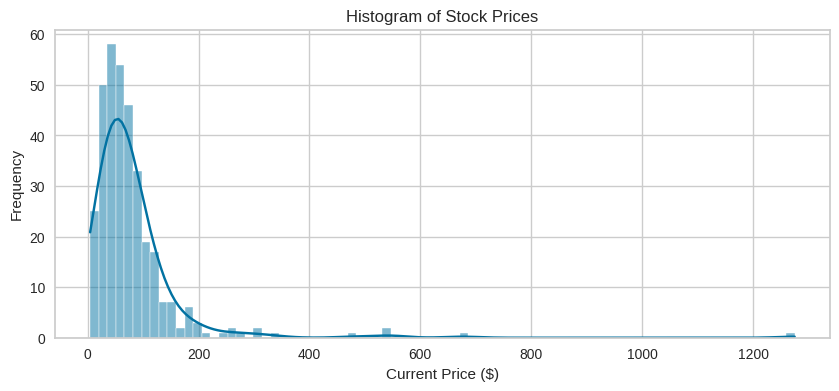

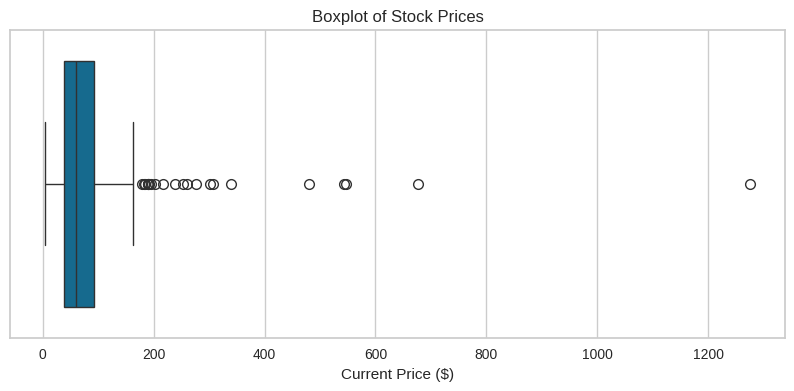

In [34]:
# Histogram
plt.figure(figsize=(10, 4))
sns.histplot(trade_stock_df['Current Price'], kde=True)
plt.title('Histogram of Stock Prices')
plt.xlabel('Current Price ($)')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=trade_stock_df['Current Price'])
plt.title('Boxplot of Stock Prices')
plt.xlabel('Current Price ($)')
plt.show()

***Answer:***

Most stock prices are concentrated near the lower range, while a few significantly higher values create a long right tail—indicating a positively skewed distribution.

####2. The stocks of which economic sector have seen the maximum price increase on average?

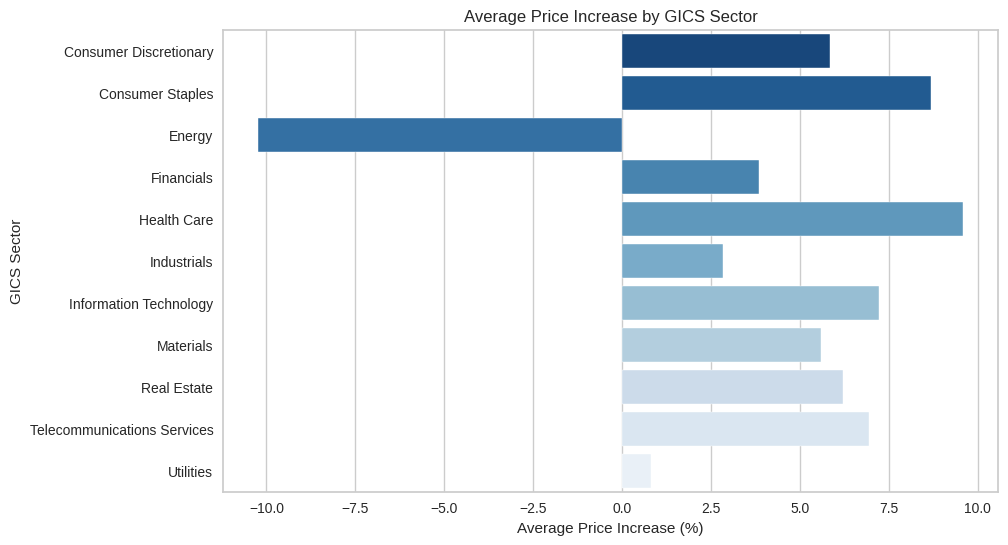

In [35]:
# Group by 'GICS Sector' and calculate the mean 'Price Change'
avg_price_increase_by_sector = trade_stock_df.groupby('GICS Sector')['Price Change'].mean().reset_index()

# Sort the results
avg_price_increase_by_sector_sorted = avg_price_increase_by_sector.sort_values('Price Change', ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Price Change', y='GICS Sector', data=avg_price_increase_by_sector_sorted, palette='Blues_r')
plt.title('Average Price Increase by GICS Sector')
plt.xlabel('Average Price Increase (%)')
plt.ylabel('GICS Sector')
plt.show()

***Answer:***

Average price movements vary across sectors, with Information Technology showing the steepest increase and Energy seen a price decrease. Health Care, Consumer Discretionary, and Materials follow with notable gains

####3. How are the different variables correlated with each other?

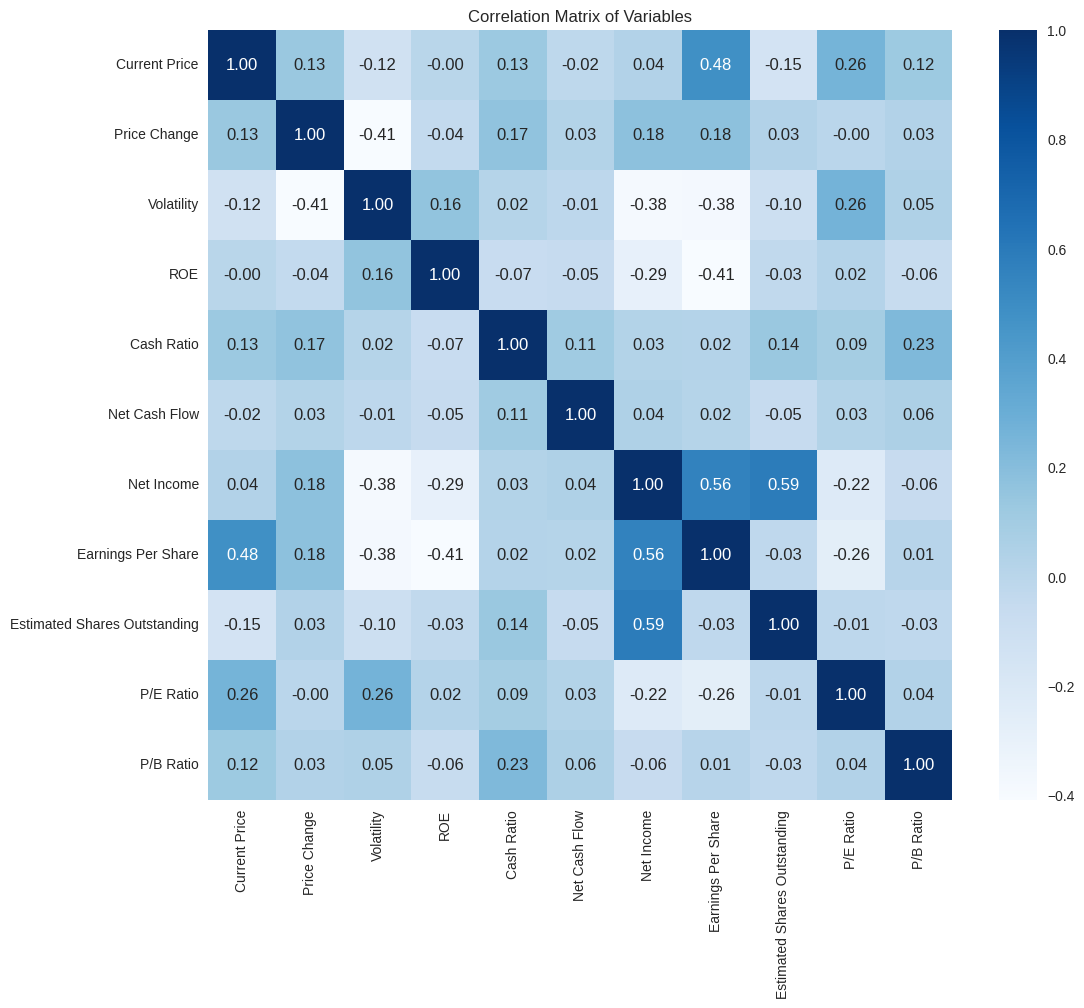

In [36]:
# Select only numeric columns for correlation matrix
numeric_df = trade_stock_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix on numeric columns only
corr = numeric_df.corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix of Variables')
plt.show()

***Answer:***

 - Current Price and Earnings Per share show a moderate positive correlation (0.48), suggesting that higher-priced stocks tend to have higher earnings per share.

 - Net Income correlates positively with both Earnings Per share (0.56) and Estimated Shares Outstanding (0.59), indicating that more profitable companies often have broader share bases and stronger per-share earnings.

 - Volatility has a moderate negative correlation with Price Change (-0.41), implying that highly volatile stocks may experience smaller average gains.

 - ROE exhibits minimal correlation with other metrics, reinforcing its role as an independent performance indicator.

 - P/E Ratio shows low correlation across the board, suggesting it reflects market sentiment or valuation expectations beyond core financial metrics.

####4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

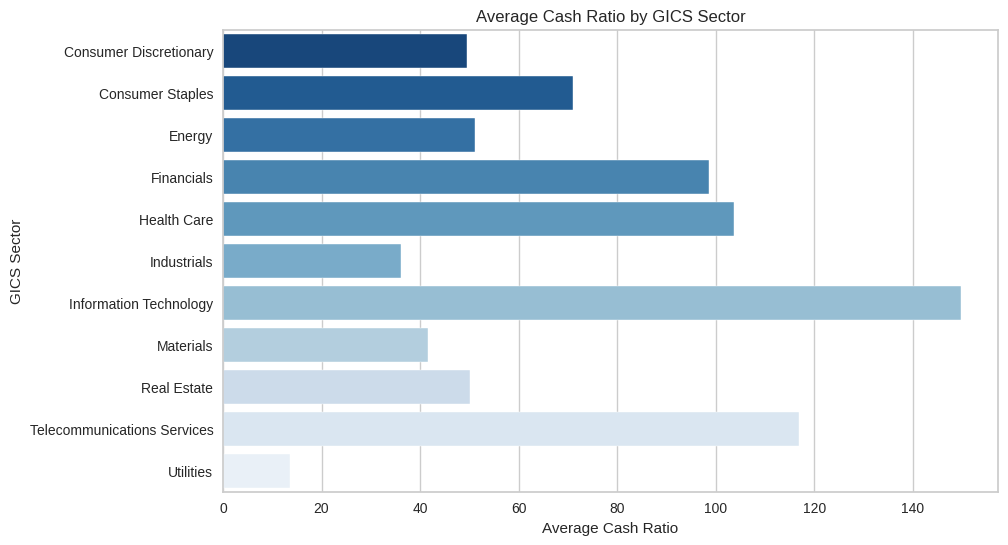

In [37]:
# Calculate the mean 'Cash Ratio' for each 'GICS Sector'
avg_cash_ratio_by_sector = trade_stock_df.groupby('GICS Sector')['Cash Ratio'].mean().reset_index()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Cash Ratio', y='GICS Sector', data=avg_cash_ratio_by_sector, palette='Blues_r')
plt.title('Average Cash Ratio by GICS Sector')
plt.xlabel('Average Cash Ratio')
plt.ylabel('GICS Sector')
plt.show()

***Answer:***

 - The Information Technology and Telecom Services sectors exhibit the highest average cash ratios, reflecting strong financial stability

####5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

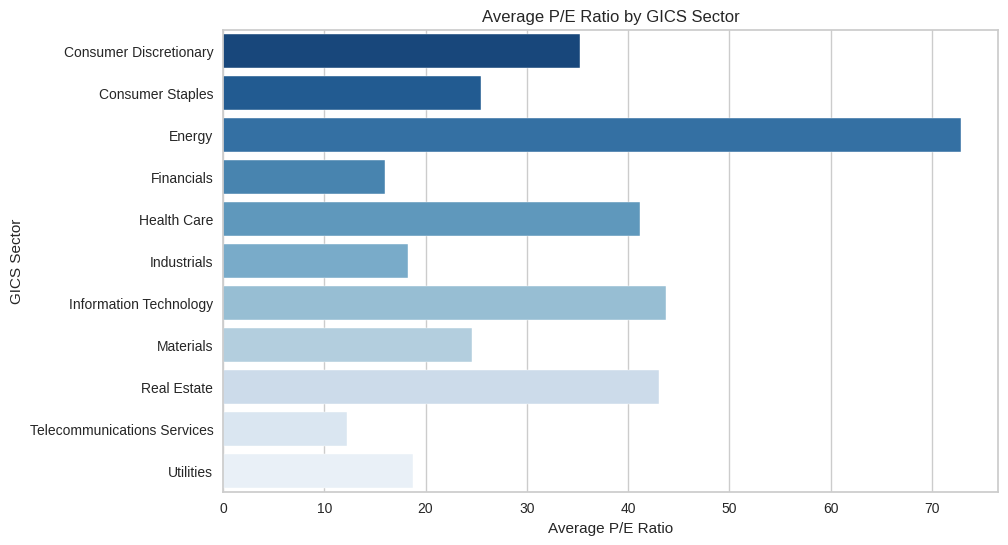

In [38]:
# Calculate the mean 'P/E Ratio' for each 'GICS Sector'
avg_pe_ratio_by_sector = trade_stock_df.groupby('GICS Sector')['P/E Ratio'].mean().reset_index()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='P/E Ratio', y='GICS Sector', data=avg_pe_ratio_by_sector, palette='Blues_r')
plt.title('Average P/E Ratio by GICS Sector')
plt.xlabel('Average P/E Ratio')
plt.ylabel('GICS Sector')
plt.show()


***Answer:***

 - A longer bar represents a higher price-to-earnings (P/E) ratio—such as in the Energy sector—implying that, on average, stocks in this category are valued more richly relative to their earnings.

Function for Numerical and Categorical Feature Visualisation

In [39]:
def hist_and_boxplot(data, variable, figsize=(12, 4), kde=False, bins=None):
    """
    Creates a plot with both a histogram and boxplot for a specified numerical variable.

    Args:
    - data: The DataFrame containing the data.
    - variable: The name of the numerical variable (feature) to be plotted.
    - figsize: A tuple representing the size of the figure.
    - density_curve: A boolean indicating whether to overlay a density curve curve on the histogram.
    - bins: An integer representing the number of bins for the histogram, or None for automatic bin size.

    Returns:
    None
    """
    # Set up the matplotlib figure with two rows and one column
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, sharex=True, gridspec_kw={'height_ratios': [0.2, 0.8]})

    # Plot the boxplot on the first row
    sns.boxplot(x=variable, data=data, ax=ax1, showmeans=True, color='lightblue')
    ax1.set(xlabel='', title=f'Boxplot and Distribution of {variable}')

    # Plot the histogram on the second row
    if bins:
        sns.histplot(data[variable], kde=kde, bins=bins, ax=ax2, color='lightblue')
    else:
        sns.histplot(data[variable], kde=kde, ax=ax2, color='lightblue')

 # Draw lines for mean and median
    mean_val = data[variable].mean()
    median_val = data[variable].median()
    ax2.axvline(mean_val, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax2.axvline(median_val, color='black', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

    # Add legend to the histogram
    ax2.legend()

    plt.show()

In [40]:
def custom_barplot(data, feature, perc=False, top_n=None):
    """
    Creates a bar plot with labels for each bar from the dataframe data.

    Args:
    - data: The DataFrame containing the data.
    - feature: The column name to plot.
    - perc: A boolean to indicate whether to display the percentage (True) or count (False).
    - top_n: An integer to display only the top N categories, or None to display all.

    Returns:
    None
    """
    total_entries = len(data[feature])  # The total number of entries
    category_counts = data[feature].value_counts()

    # Determine the figure size based on the number of categories
    fig_width = top_n + 2 if top_n is not None else category_counts.size + 2
    plt.figure(figsize=(fig_width, 6))

    # Create the bar plot
    category_order = category_counts.index[:top_n] if top_n is not None else category_counts.index
    barplot = sns.countplot(x=feature, data=data, order=category_order, palette='Blues_r')

    # Add labels to each bar
    for bar in barplot.patches:
        label_x_pos = bar.get_x() + bar.get_width() / 2
        if perc:
            label = f"{100 * bar.get_height() / total_entries:.1f}%"
        else:
            label = f"{bar.get_height()}"
        barplot.annotate(
            label,
            (label_x_pos, bar.get_height()),
            ha='center',
            va='bottom',
            fontsize=11,
            textcoords='offset points',
            xytext=(0, 0)
        )

    # Rotate x-axis labels if there are many categories
    if category_counts.size > 10:
        plt.xticks(rotation=45, ha='right')

    # Adding a title
    plt.title(f'Distribution of {feature}', fontsize=15)

    plt.show()

Numerical data

In [41]:
# Get a list of the numerical variables
numerical_var = trade_stock_df.select_dtypes(include=['int64','float64']).columns
print(numerical_var)

Index(['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')


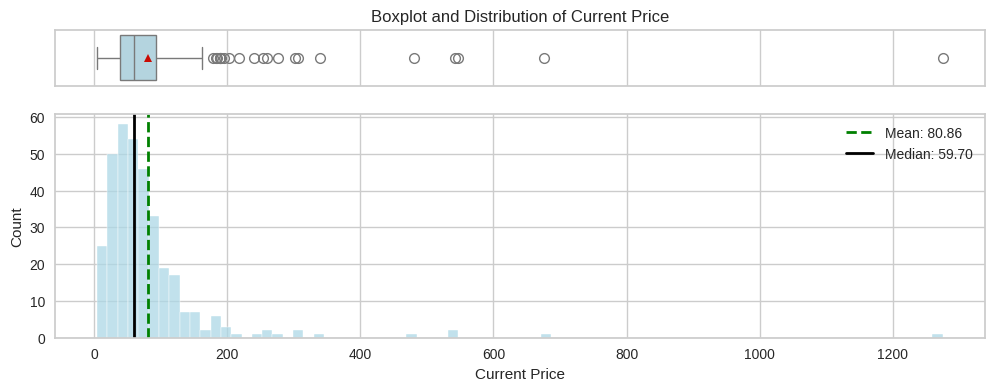

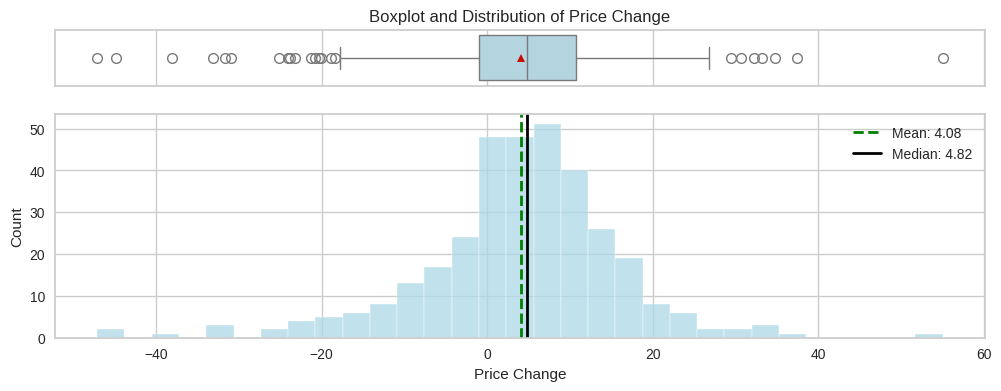

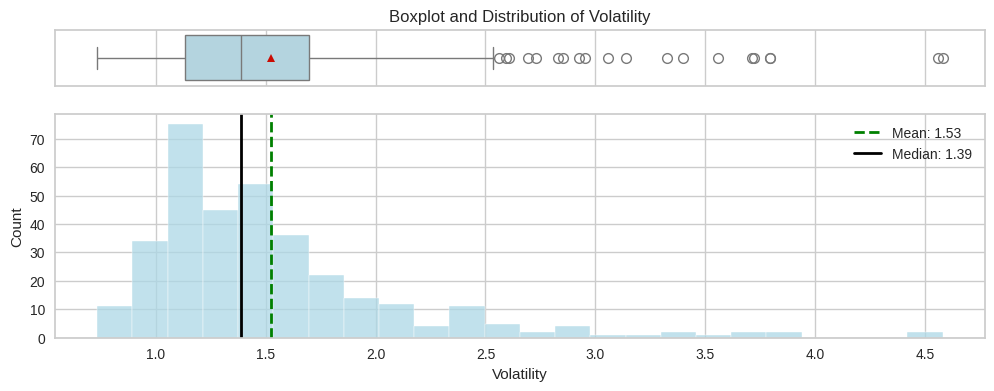

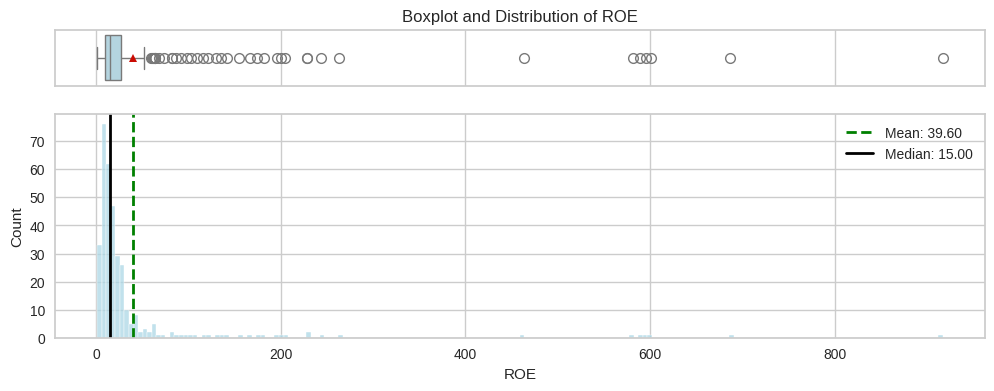

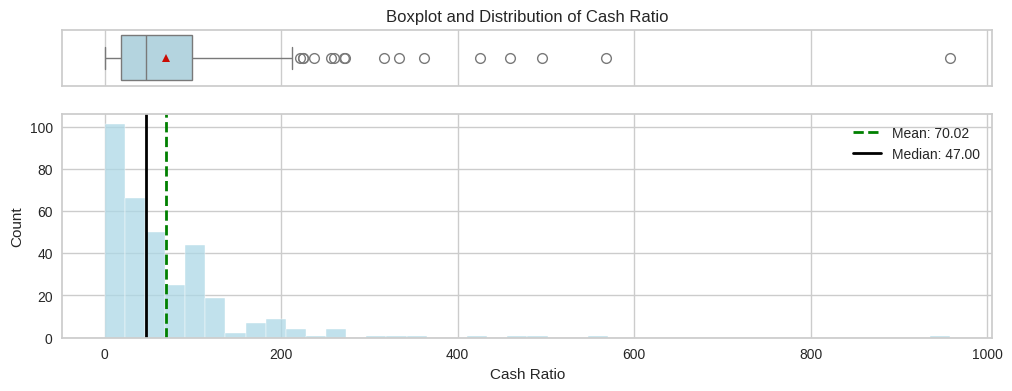

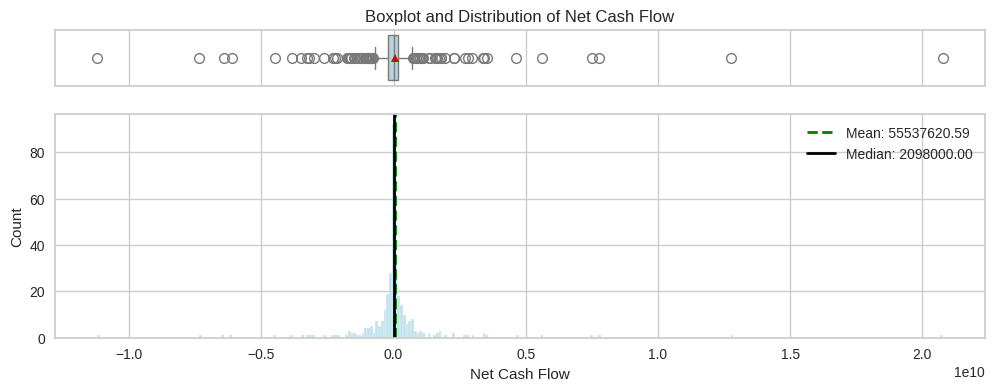

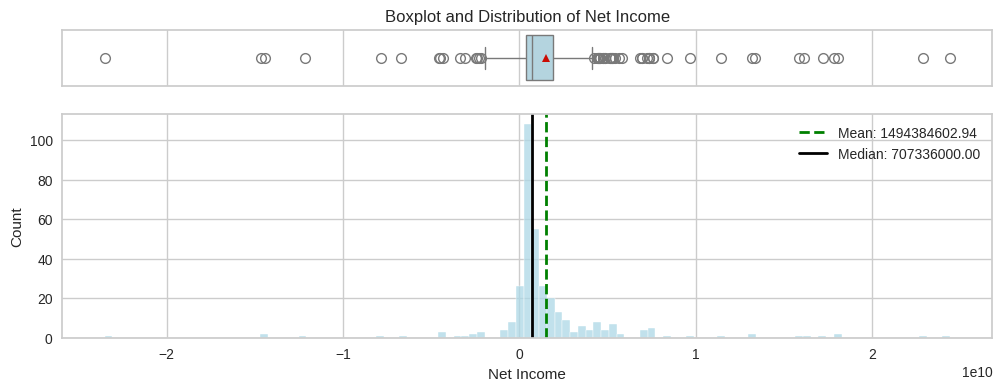

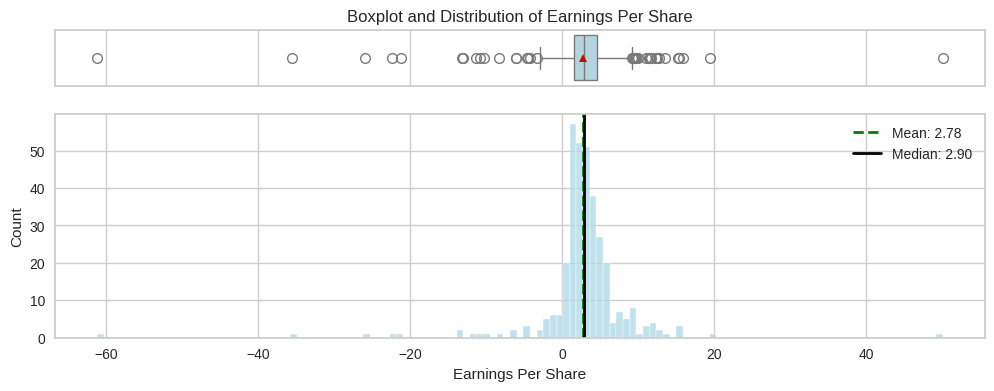

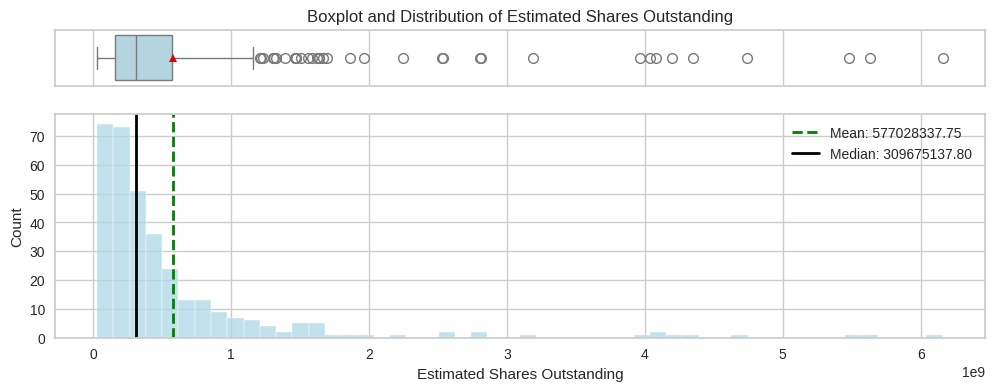

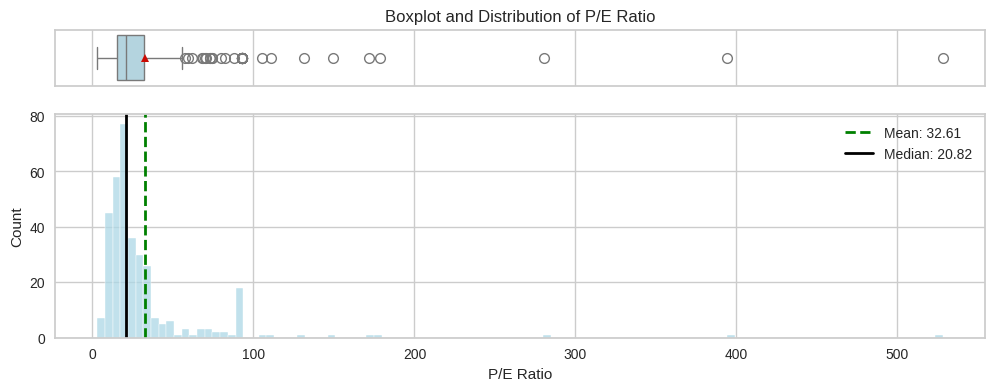

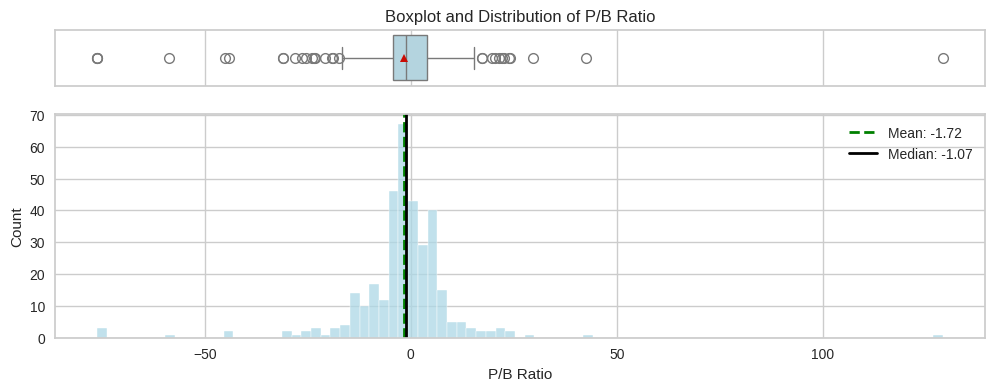

In [42]:
# Plot all the numerical variables in the data DataFrame
numerical_variables = [
    'Current Price',
    'Price Change',
    'Volatility',
    'ROE',
    'Cash Ratio',
    'Net Cash Flow',
    'Net Income',
    'Earnings Per Share',
    'Estimated Shares Outstanding',
    'P/E Ratio',
    'P/B Ratio'
    ]
# Loop through the list and creating a histogram and boxplot for each variable
for variable in numerical_variables:
   hist_and_boxplot(trade_stock_df, variable)

***Observations:***

 - Current Price A right-skewed distribution suggests that most stocks are priced on the lower end, with a few commanding significantly higher prices.

 - Price Change The presence of both positive and negative changes with long tails indicates wide variability in stock movements during the analyzed period.

 - Volatility Right skewness implies that while most stocks exhibit low volatility, a minority experience extreme price fluctuations.

 - Return on Equity (ROE) A right-skewed ROE distribution shows that most firms deliver modest returns, with a few outliers being either highly profitable or notably underperforming.

 - Cash Ratio A higher cash ratio reflects strong liquidity, suggesting that companies are well-positioned to meet short-term obligations.

 - Net Cash Flow A distribution centered around zero with outliers indicates that most firms maintain balanced cash flows, while some experience significant surpluses or deficits.

 - Net Income Right skewness here reveals that the majority of companies earn moderate profits, with a few generating substantial income or incurring large losses.

 - Earnings Per Share (EPS) Mirroring net income, EPS distribution shows most stocks with modest earnings, punctuated by a few with extreme values.

 - Price-to-Earnings (P/E) Ratio A right-skewed P/E ratio suggests that most stocks are reasonably priced relative to earnings, while some may be overvalued.

 - Price-to-Book (P/B) Ratio A distribution centered around the median with outliers on both ends reflects diverse investor sentiment regarding the intrinsic value of company assets.

Categorical data

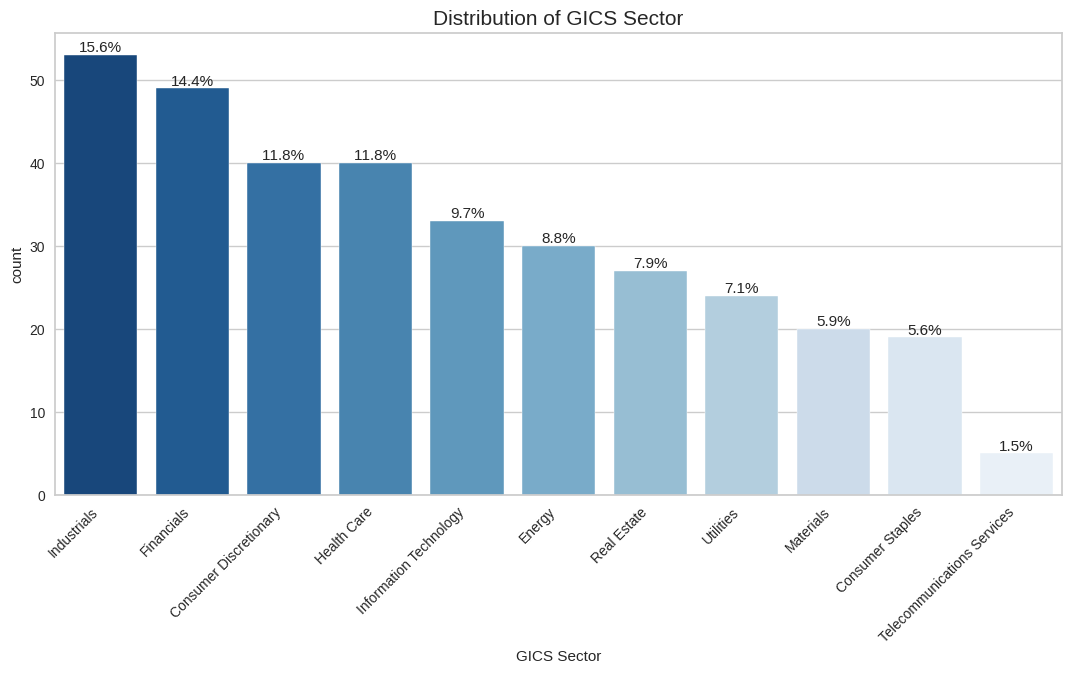

In [43]:
# Create a barplot for 'GICS Sector'
custom_barplot(data=trade_stock_df, feature='GICS Sector', perc=True, top_n=None)

***Observations:***

 - Industrials and Financials sectors lead in distribution, while Telecommunications Services is the least represented in the dataset.

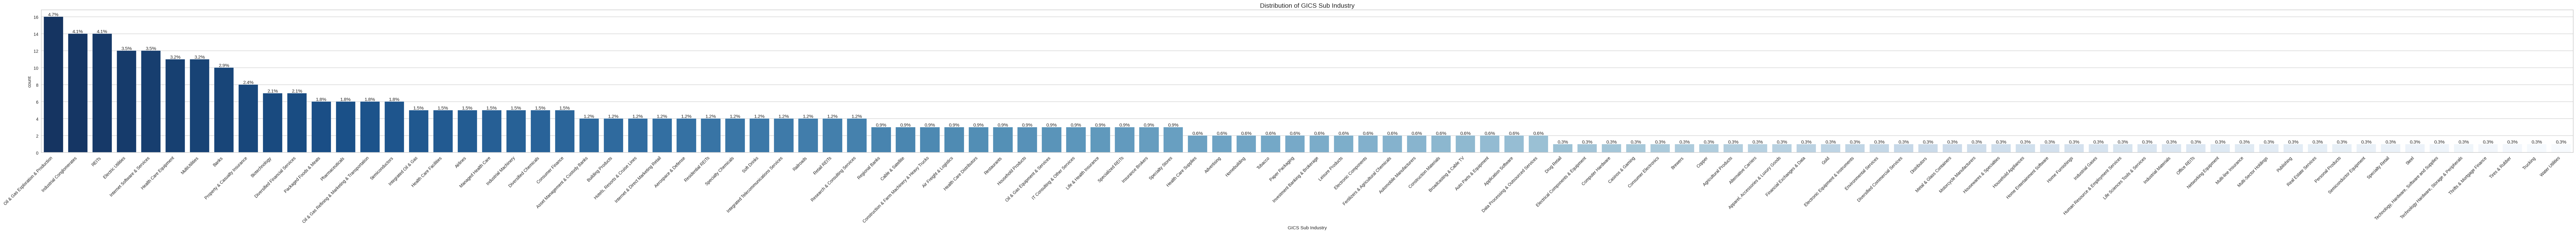

In [44]:
# Create a barplot for 'GICS Sub Industry'
custom_barplot(data=trade_stock_df, feature='GICS Sub Industry', perc=True, top_n=None)  # Set top_n as needed

***Observations:***

  - GICS Sub-Industry provides a more granular view, breaking down GICS sectors into more specific categories.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

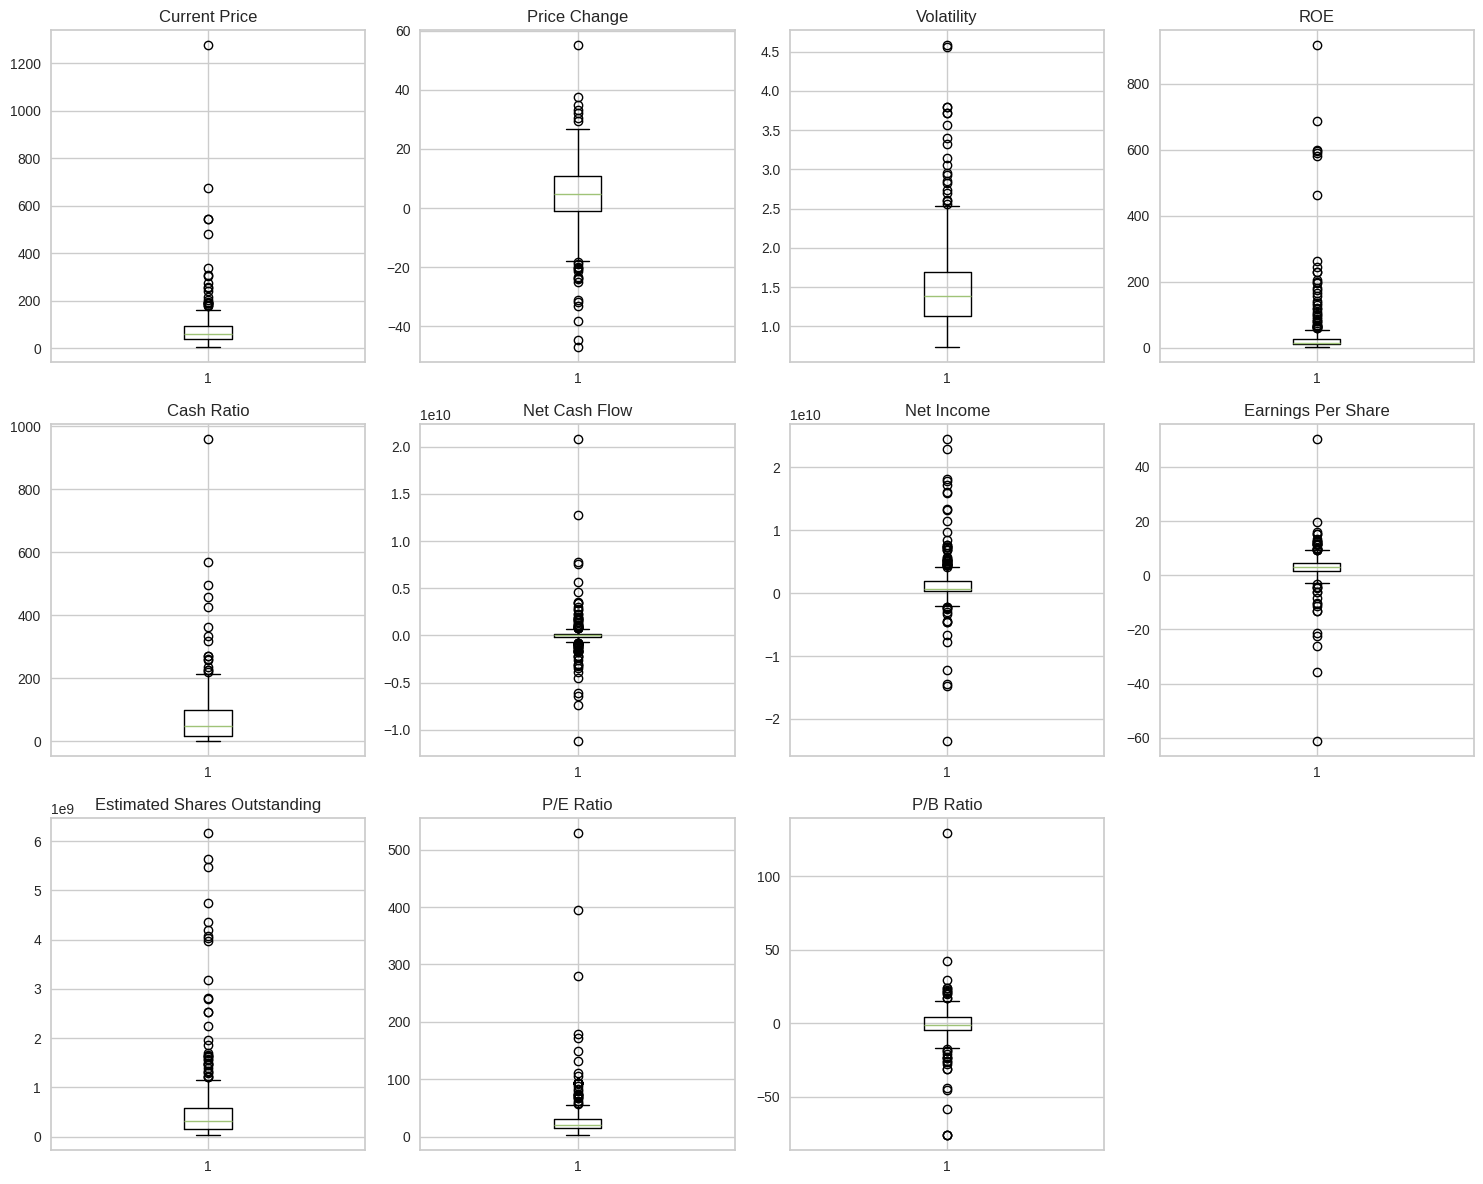

In [45]:
plt.figure(figsize=(15, 12))

numeric_columns = trade_stock_df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(trade_stock_df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

***Observations:***

In [46]:
# Drop Ticker Symbol since it is a unique identifier (same as 'Security')
trade_stock_df.drop(['Ticker Symbol'], axis=1, inplace=True)

In [47]:
trade_stock_df.head()

Security             GICS Sector      GICS Sub Industry  \
0  American Airlines Group             Industrials               Airlines   
1                   AbbVie             Health Care        Pharmaceuticals   
2      Abbott Laboratories             Health Care  Health Care Equipment   
3        Adobe Systems Inc  Information Technology   Application Software   
4     Analog Devices, Inc.  Information Technology         Semiconductors   

   Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  \
0      42.349998      9.999995    1.687151  135          51     -604000000   
1      59.240002      8.339433    2.197887  130          77       51000000   
2      44.910000     11.301121    1.273646   21          67      938000000   
3      93.940002     13.977195    1.357679    9         180     -240840000   
4      55.320000     -1.827858    1.701169   14         272      315120000   

   Net Income  Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  \
0  7610000000               11.39                  6.681299e+08    3.718174   
1  5144000000                3.15                  1.633016e+09   18.806350   
2  4423000000                2.94                  1.504422e+09   15.275510   
3   629551000                1.26                  4.996437e+08   74.555557   
4   696878000                0.31                  2.247994e+09  178.451613   

   P/B Ratio  
0  -8.784219  
1  -8.750068  
2  -0.394171  
3   4.199651  
4   1.059810

In [48]:
trade_stock_df_num = trade_stock_df.select_dtypes(include=[np.number])

### Scaling

- Let's scale the data before we proceed with clustering.

In [49]:
# scaling the data before clustering
scaler = StandardScaler()
subset = trade_stock_df_num.copy()  ##  scale the data
subset_scaled = scaler.fit_transform(subset)

In [50]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [51]:
subset_scaled_df.head()

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                      0.107863  -0.652487  -0.506653  
1                      1.250274  -0.311769  -0.504205  
2                      1.098021  -0.391502   0.094941  
3                     -0.091622   0.947148   0.424333  
4                      1.978399   3.293307   0.199196

## EDA

- It is a good idea to explore the data once again after manipulating it.

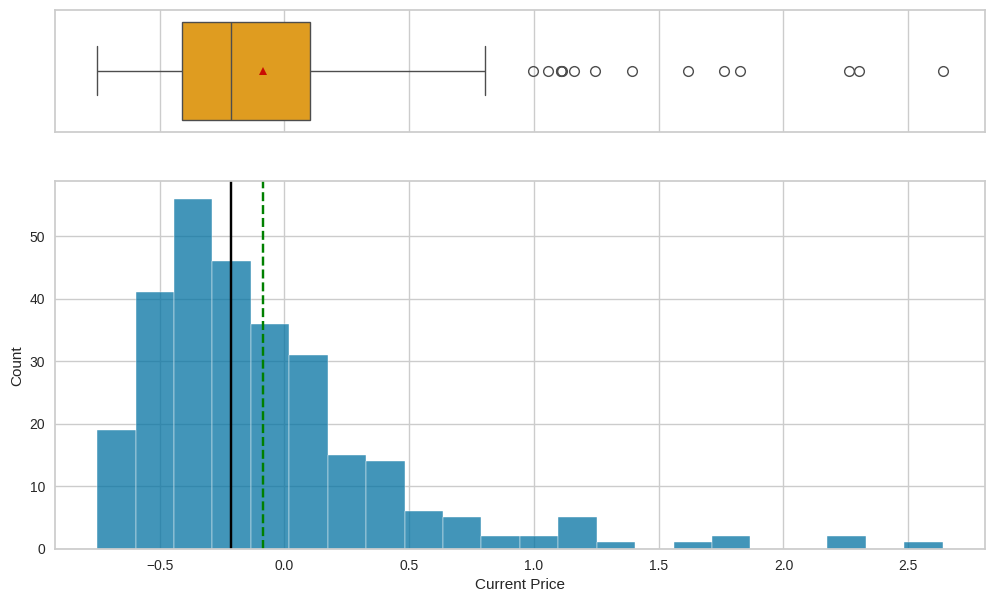

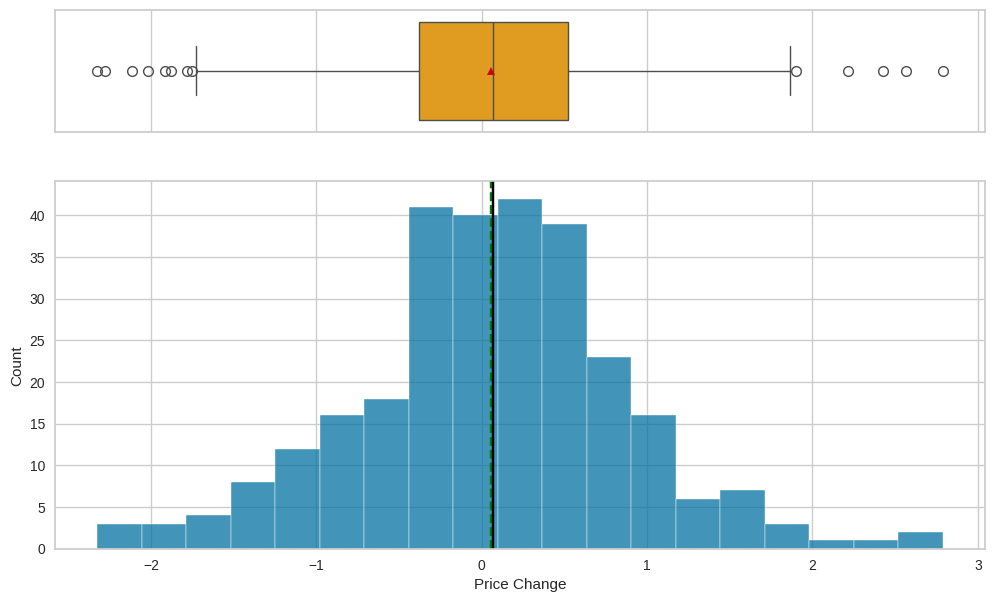

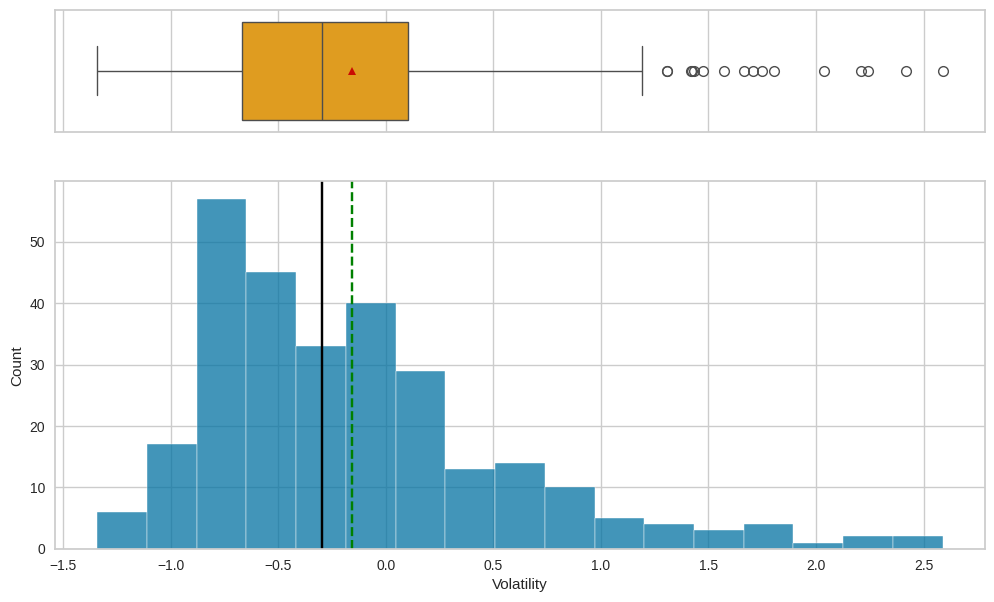

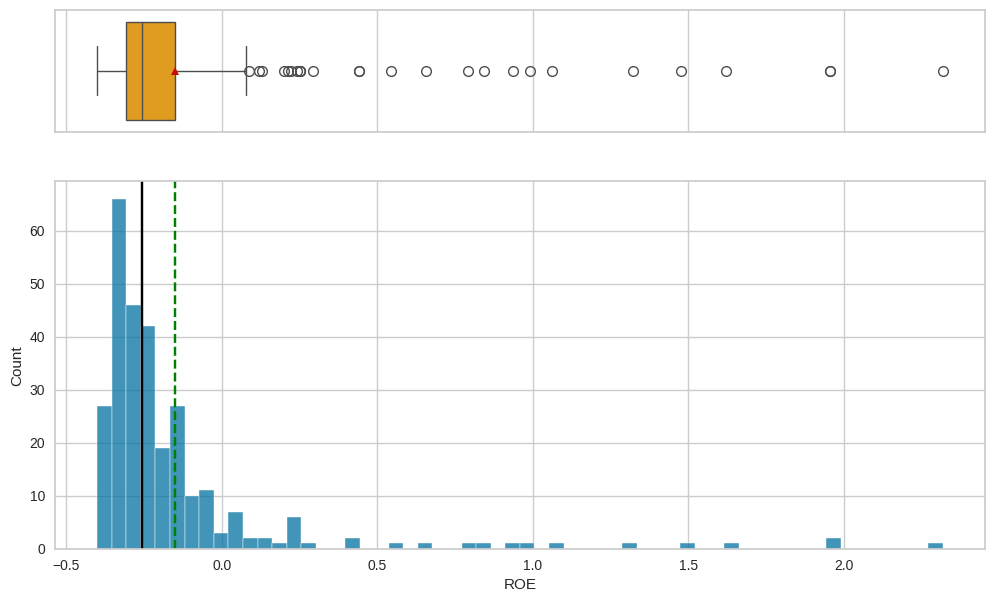

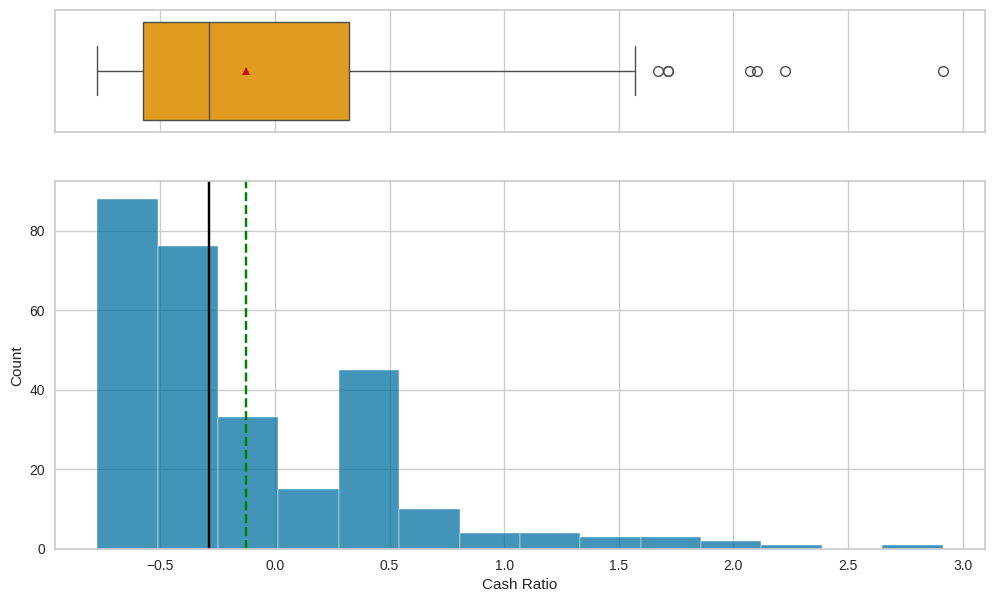

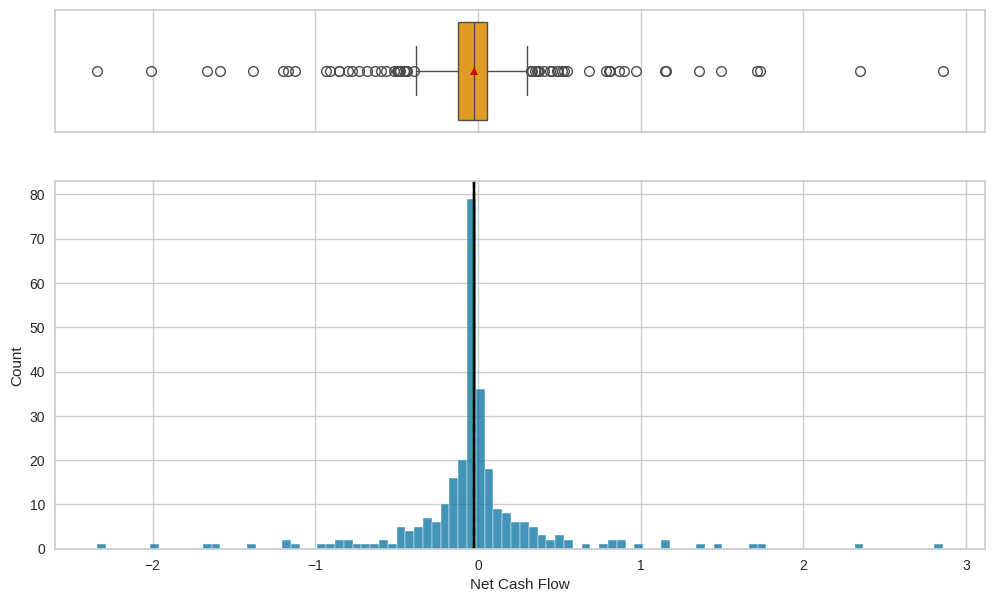

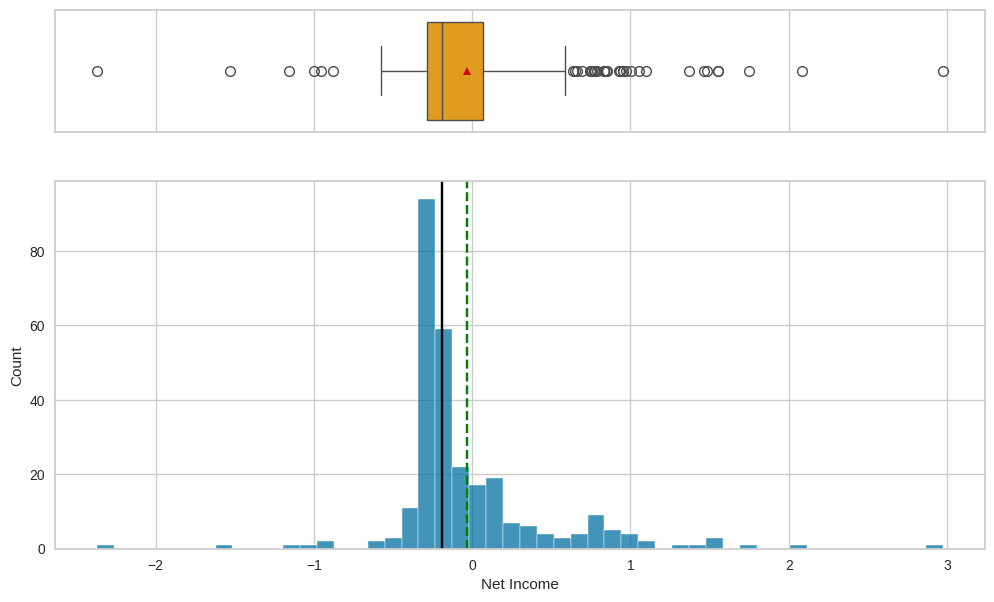

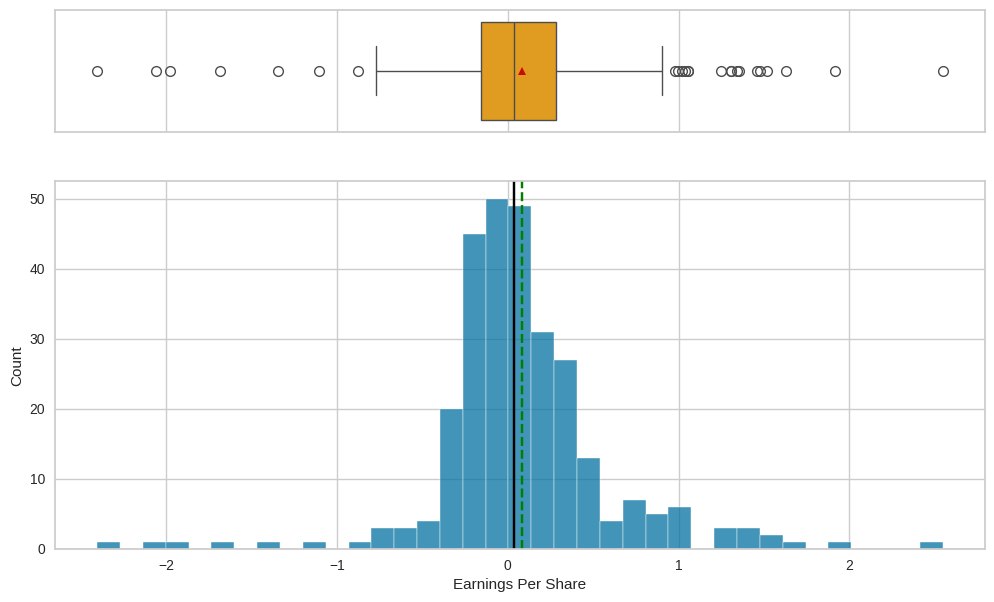

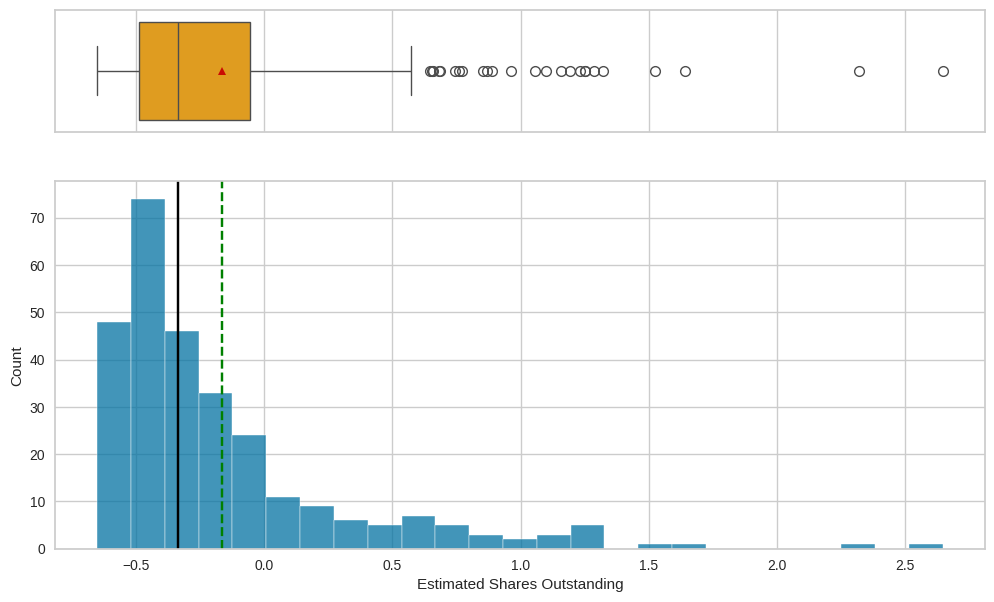

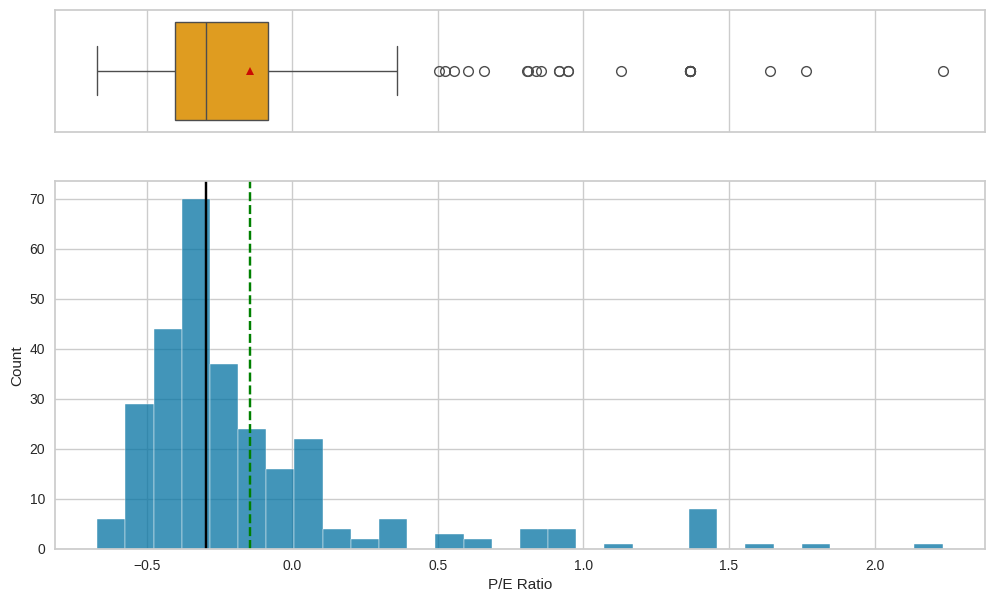

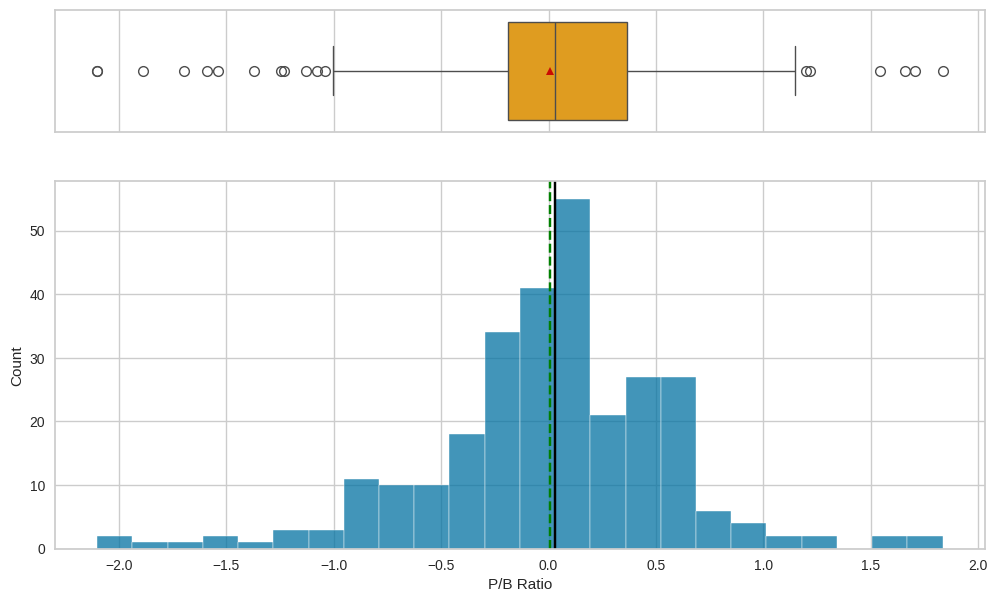

In [52]:
# Define a threshold to identify an outlier
threshold = 3

# Remove rows where any of the scaled values are greater than the absolute value of the threshold
df_no_outliers = subset_scaled_df[(np.abs(subset_scaled_df) < threshold).all(axis=1)]

# Loop through the list and creating a histogram and boxplot for each variable
for variable in numeric_columns:
  histogram_boxplot(df_no_outliers, variable)




***Observations:***

Outlier removal has minimal impact on the data’s distribution and skewness, keeping them ensures the dataset reflects its full variability.

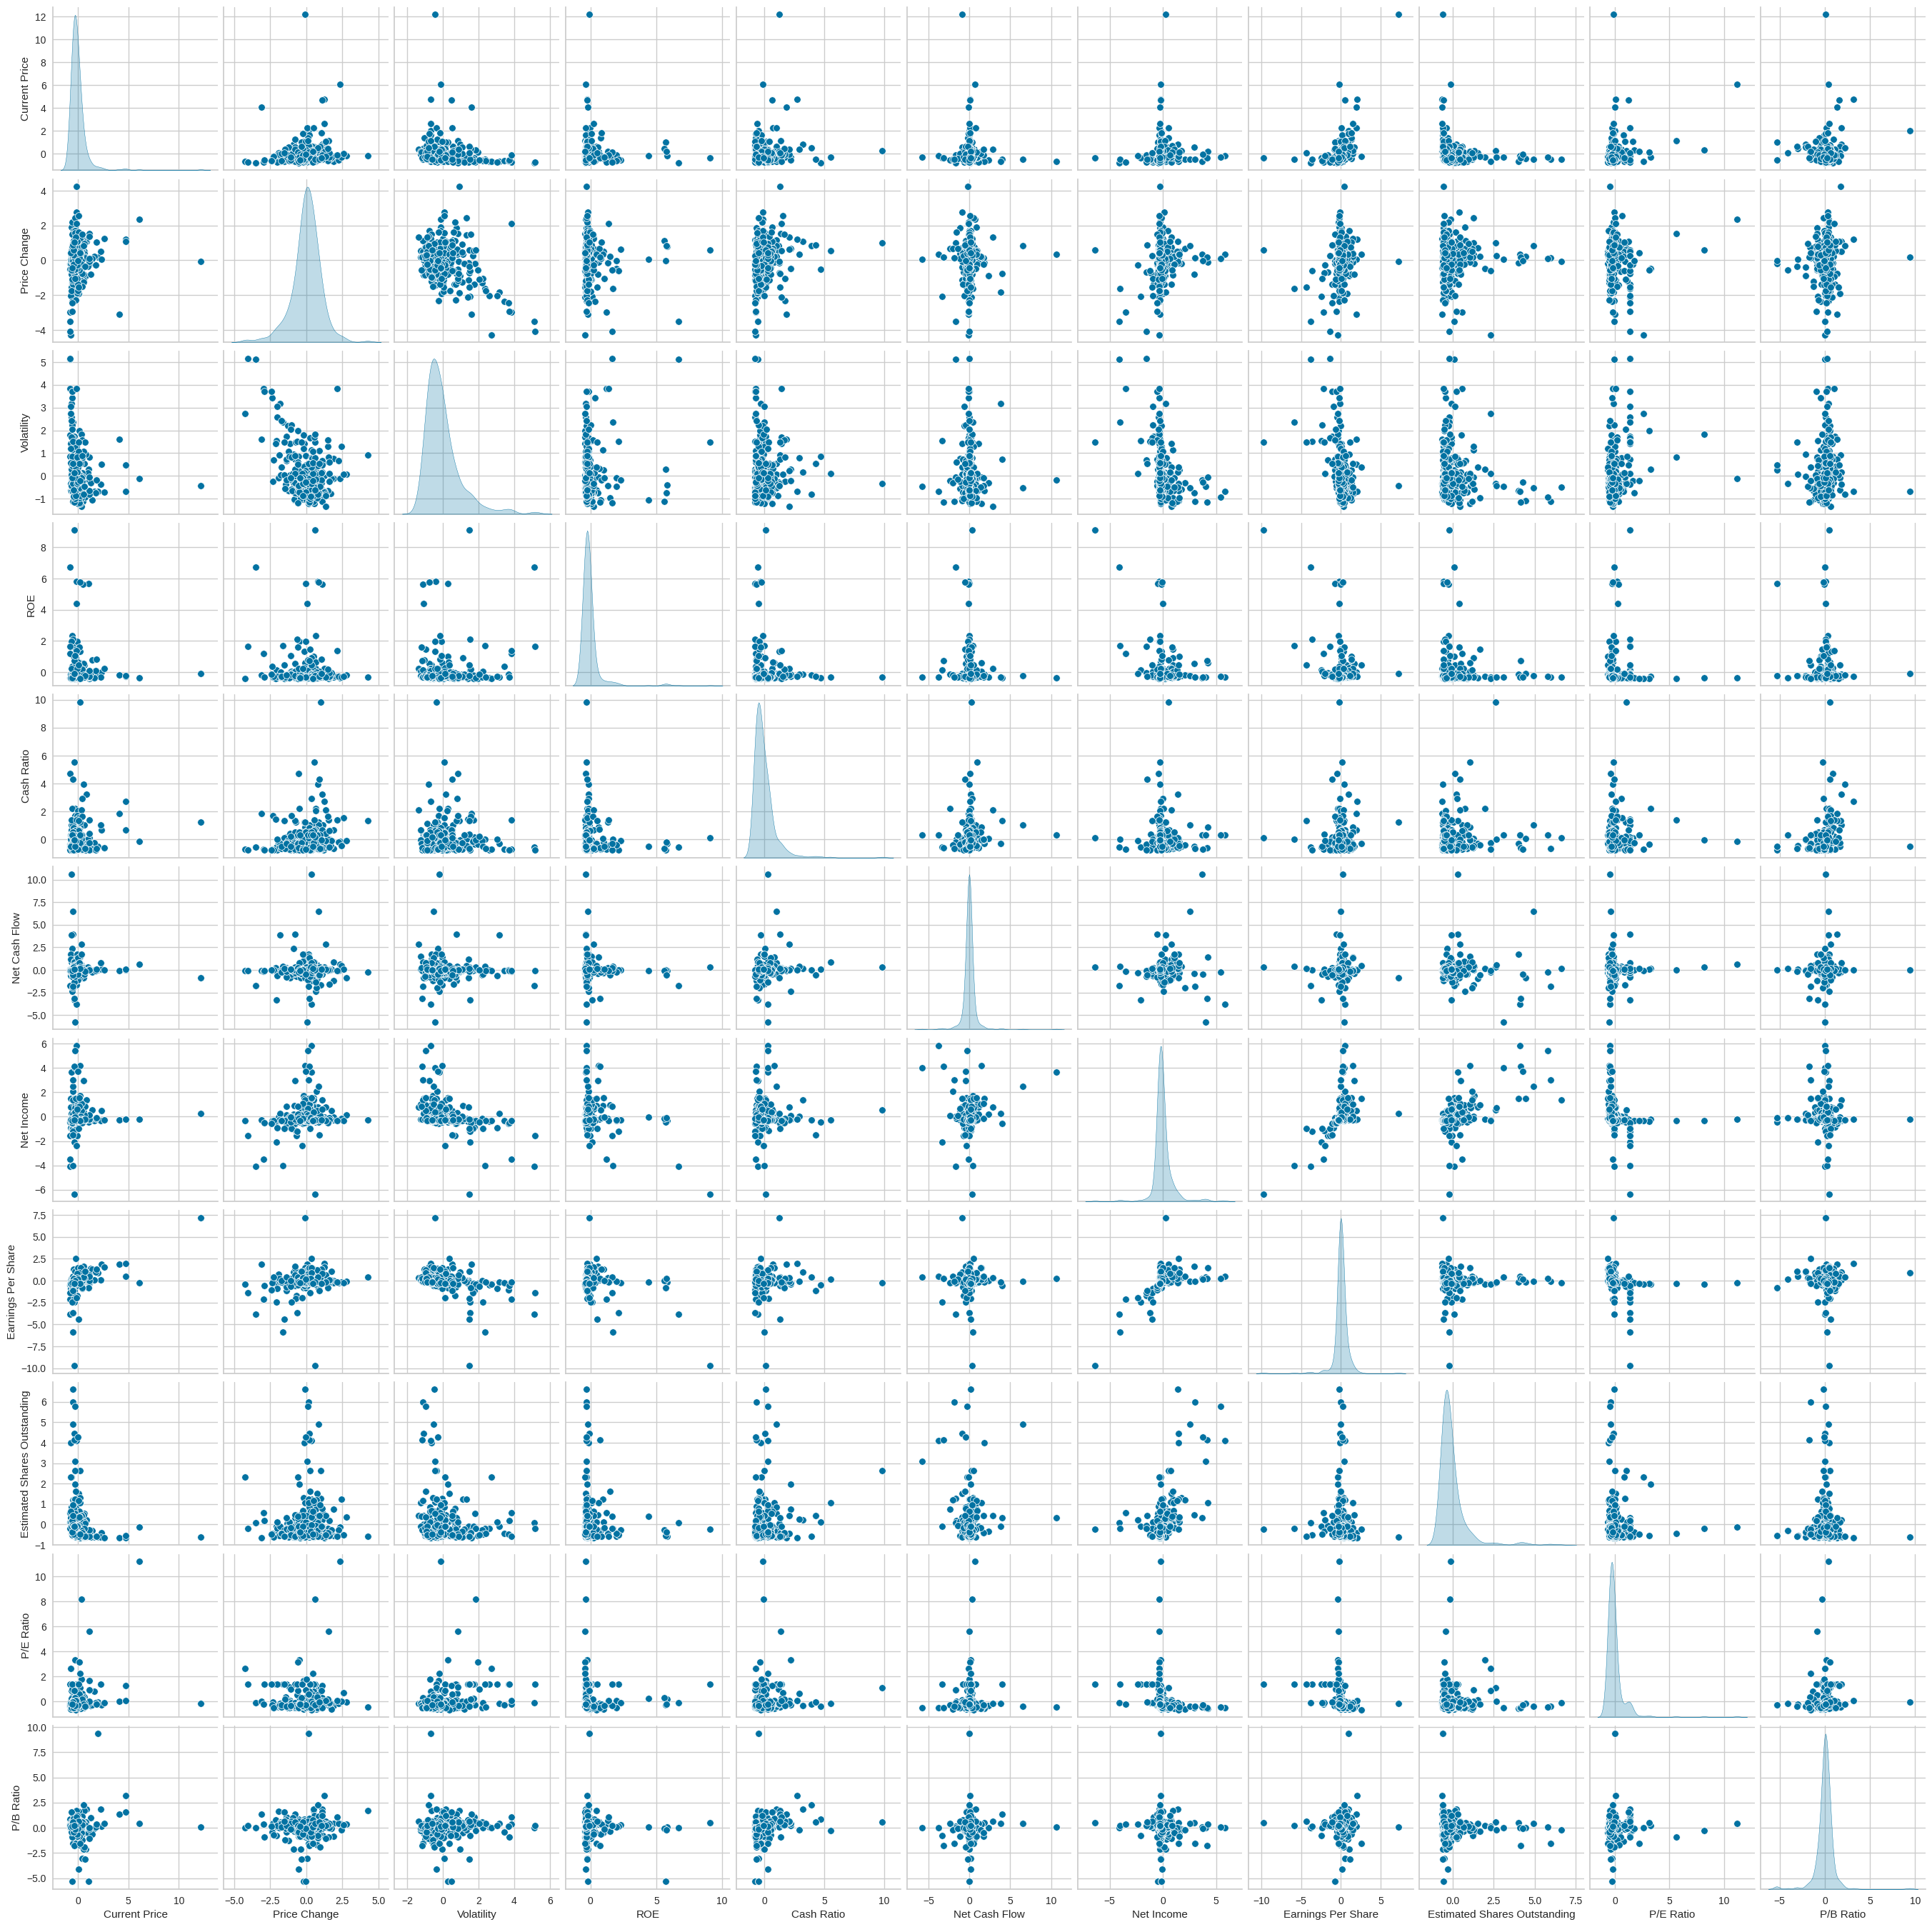

In [53]:
# create a pairplot to visualize the scaled data for the probability density of the variables at different values
sns.pairplot(subset_scaled_df,diag_kind = 'kde')
plt.show()

***Observations:***

 - The diagonal KDE of P/C Ratio seems to have 2 peaks but are barely noticable.
 - There are no distinct grouping in the scatterplots either with no clear correlation between variables.
 - The outliers present warrent further investigation.
 - The current visualizations offer limited guidance in determining an optimal number of clusters. Alternative dimensionality reduction techniques or clustering validation metrics may be necessary to uncover meaningful groupings.

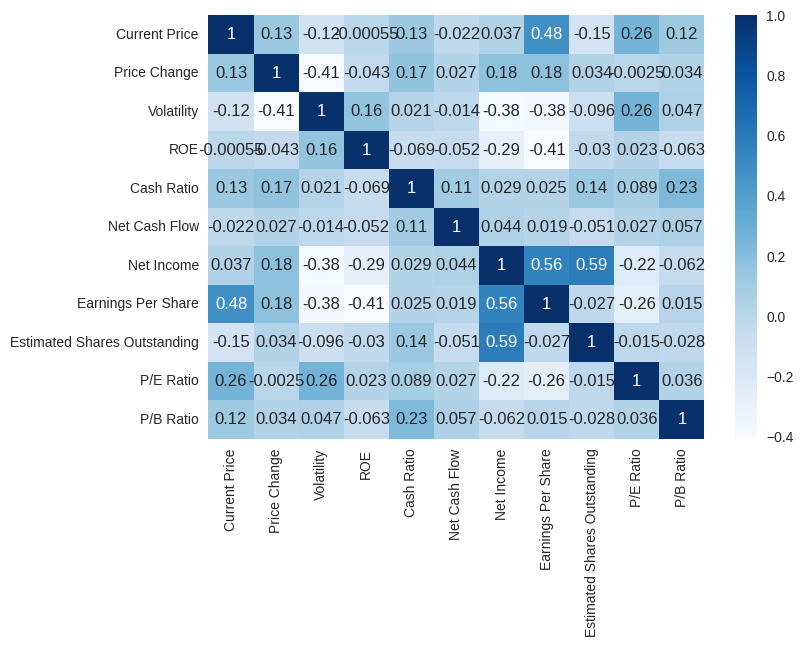

In [54]:
sns.heatmap(subset_scaled_df.corr(), annot=True, cmap='Blues')
plt.show()

***Observation:***



*   The diagonal KDE of P/C Ratio seems to have 2 peaks and are weakly defined.
*   Scatterplots reveal no distinct groupings or strong correlations among variables.
*   These visual cues offer limited direction for estimating the number of clusters, suggesting that further dimensionality reduction may be needed.






##Principal Component Analysis (PCA)

Perform PCA on scaled data and visualize the amount of variance of each principal component.

In [55]:
# Calculate the covariance matrix (captures the variance and covariance between features)
covMatrix = np.cov(subset_scaled_df,rowvar=False)
print(covMatrix)

[[ 1.00294985e+00  1.35379678e-01 -1.24623162e-01 -5.51076941e-04
   1.28193172e-01 -2.20255018e-02  3.67332609e-02  4.81018703e-01
  -1.45735035e-01  2.61040375e-01  1.25001740e-01]
 [ 1.35379678e-01  1.00294985e+00 -4.09485757e-01 -4.34381685e-02
   1.69082964e-01  2.68245310e-02  1.79826528e-01  1.75918225e-01
   3.37550438e-02 -2.49801709e-03  3.44304592e-02]
 [-1.24623162e-01 -4.09485757e-01  1.00294985e+00  1.63011319e-01
   2.06659452e-02 -1.42137739e-02 -3.84563951e-01 -3.80427812e-01
  -9.59867699e-02  2.64377469e-01  4.66653027e-02]
 [-5.51076941e-04 -4.34381685e-02  1.63011319e-01  1.00294985e+00
  -6.93260015e-02 -5.23589005e-02 -2.89375193e-01 -4.06486472e-01
  -3.03773642e-02  2.34095558e-02 -6.34048877e-02]
 [ 1.28193172e-01  1.69082964e-01  2.06659452e-02 -6.93260015e-02
   1.00294985e+00  1.14154326e-01  2.86730699e-02  2.48317919e-02
   1.36269927e-01  8.97470272e-02  2.30349368e-01]
 [-2.20255018e-02  2.68245310e-02 -1.42137739e-02 -5.23589005e-02
   1.14154326e-01  

In [56]:
# Initialize PCA with 11 components and fit model to scaled data
from sklearn.decomposition import PCA
pca = PCA(n_components= 11)
pca.fit(subset_scaled_df)

PCA(n_components=11)

In [57]:
# PCA results
# Print the eigenVALUES associated with each principal component, which indicate the variance captured by each component
explained_variance_ratio = pca.explained_variance_ratio_
print('EigenValues\n',pca.explained_variance_)
print('\nExplained variance rati0 (normalized EigenValues)\n',explained_variance_ratio) #showing the proportion of total variance explained by each component

EigenValues
 [2.51212401 1.58411327 1.33434149 1.11310406 1.09308721 0.95662194
 0.82731447 0.71754029 0.4845015  0.2833637  0.12633645]

Explained variance rati0 (normalized EigenValues)
 [0.22770322 0.14358674 0.120947   0.10089366 0.09907929 0.08670985
 0.0749892  0.06503908 0.04391604 0.02568457 0.01145135]


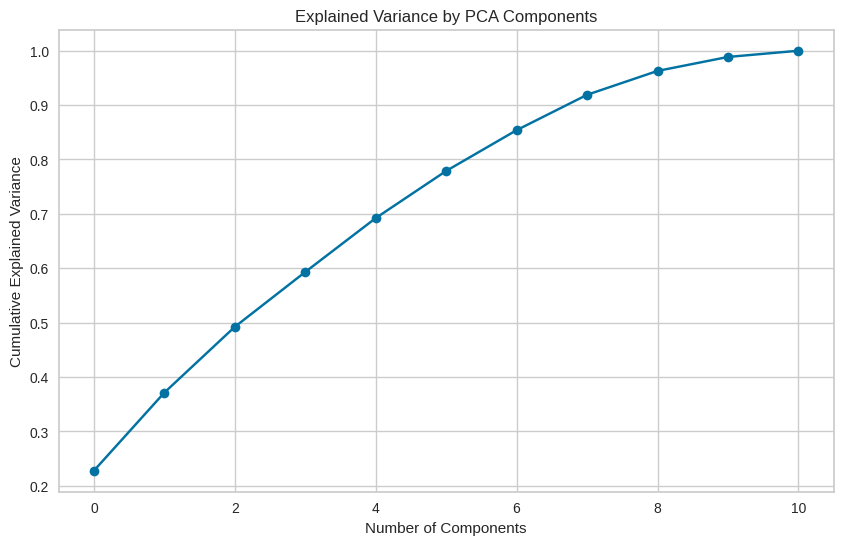

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

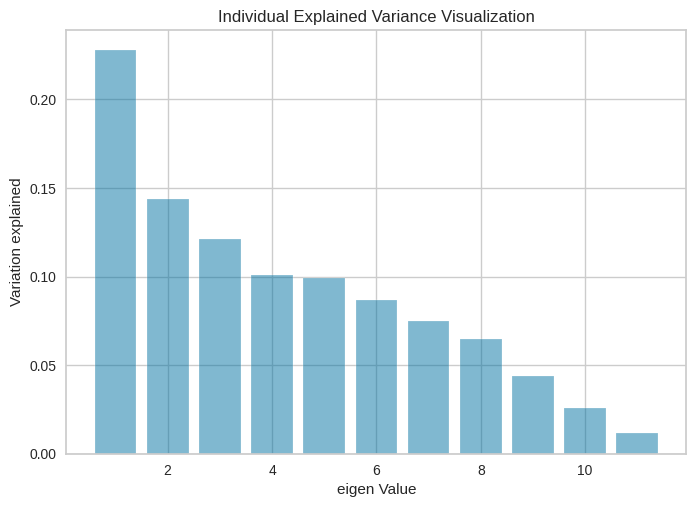

In [59]:
# Create a bar chart showing the proportion of variance explained by each principal component
plt.bar(list(range(1,12)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.title("Individual Explained Variance Visualization")
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

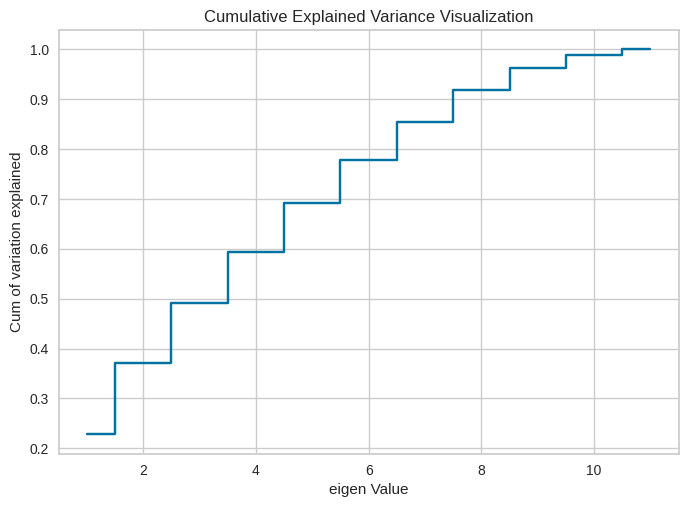

In [60]:
# Create a step plot showing the cumulative proportion of variance explained by the components
plt.step(list(range(1,12)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.title("Cumulative Explained Variance Visualization")
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [61]:
#extract the top 3 contributing features for each component

feature_names = trade_stock_df_num.columns
components_df = pd.DataFrame(np.round(pca.components_, 3), columns=feature_names)

# Display top 3 features per component
for i, row in components_df.iterrows():
    print(f"\nTop features for PC{i+1}:")
    top_features = row.abs().sort_values(ascending=False).head(3).index.tolist()
    print(top_features)


Top features for PC1:
['Net Income', 'Earnings Per Share', 'Volatility']

Top features for PC2:
['Current Price', 'P/E Ratio', 'Estimated Shares Outstanding']

Top features for PC3:
['Estimated Shares Outstanding', 'Cash Ratio', 'P/B Ratio']

Top features for PC4:
['Price Change', 'ROE', 'Volatility']

Top features for PC5:
['Net Cash Flow', 'P/E Ratio', 'Current Price']

Top features for PC6:
['Net Cash Flow', 'P/B Ratio', 'P/E Ratio']

Top features for PC7:
['ROE', 'Current Price', 'Price Change']

Top features for PC8:
['Cash Ratio', 'P/B Ratio', 'P/E Ratio']

Top features for PC9:
['Volatility', 'Price Change', 'Earnings Per Share']

Top features for PC10:
['Current Price', 'Estimated Shares Outstanding', 'Net Income']

Top features for PC11:
['Earnings Per Share', 'Net Income', 'Estimated Shares Outstanding']


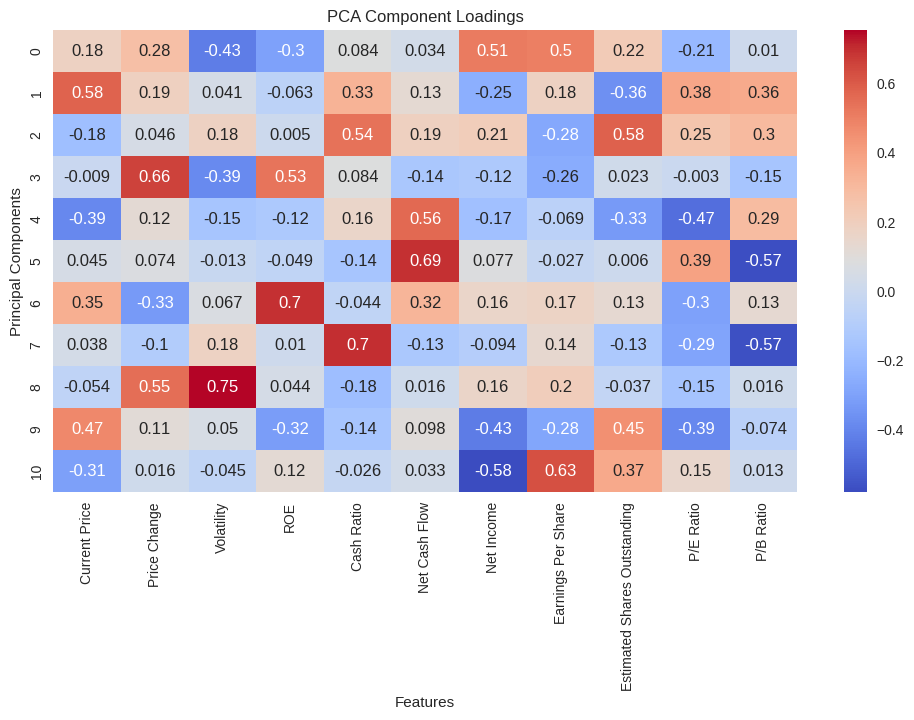

In [62]:
#heatmap to visualize
plt.figure(figsize=(12, 6))
sns.heatmap(components_df, cmap='coolwarm', annot=True)
plt.title("PCA Component Loadings")
plt.xlabel("Features")
plt.ylabel("Principal Components")
plt.show()

***Observations:***

 - Analyzing the explained variance helps determine how many principal components are necessary to represent the majority of the dataset. In this case, it appears that all components contribute meaningful information—suggesting that each one captures a distinct aspect of the data's structure.

 - For supervised learning tasks, where a target variable guides the modeling process, dimensionality reduction is often beneficial to improve performance and reduce noise.

 - In contrast, for unsupervised learning—especially clustering—outliers can distort group formation. While these outliers can be excluded to refine clusters, here we’ve chosen to retain them. Rather than reducing the number of variables, we focus on identifying and addressing these outlier points directly.

## K-means Clustering

### Checking Elbow Plot

In [63]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.3862098789299604
Number of Clusters: 3 	Average Distortion: 2.33620927590848
Number of Clusters: 4 	Average Distortion: 2.219050563833442
Number of Clusters: 5 	Average Distortion: 2.133404401901685
Number of Clusters: 6 	Average Distortion: 2.081503686093715
Number of Clusters: 7 	Average Distortion: 2.0045413402786814
Number of Clusters: 8 	Average Distortion: 1.9864237824874411
Number of Clusters: 9 	Average Distortion: 1.956222103389025
Number of Clusters: 10 	Average Distortion: 1.9360473996664198
Number of Clusters: 11 	Average Distortion: 1.8615942883461607
Number of Clusters: 12 	Average Distortion: 1.8219574388532505
Number of Clusters: 13 	Average Distortion: 1.7936924742607907
Number of Clusters: 14 	Average Distortion: 1.7567842179093438


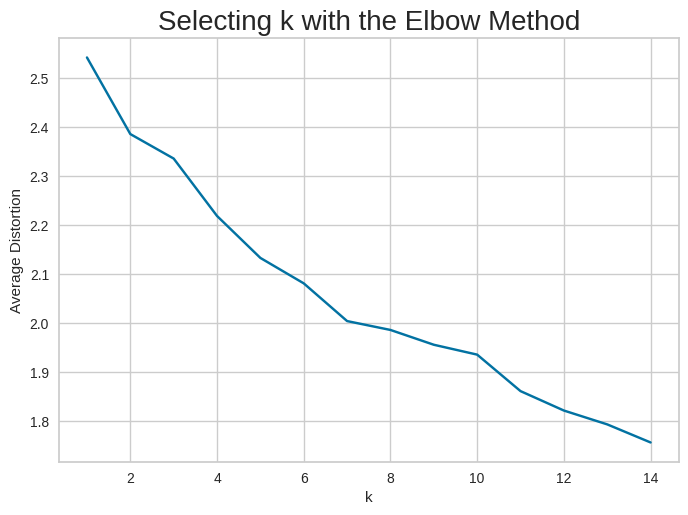

In [64]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

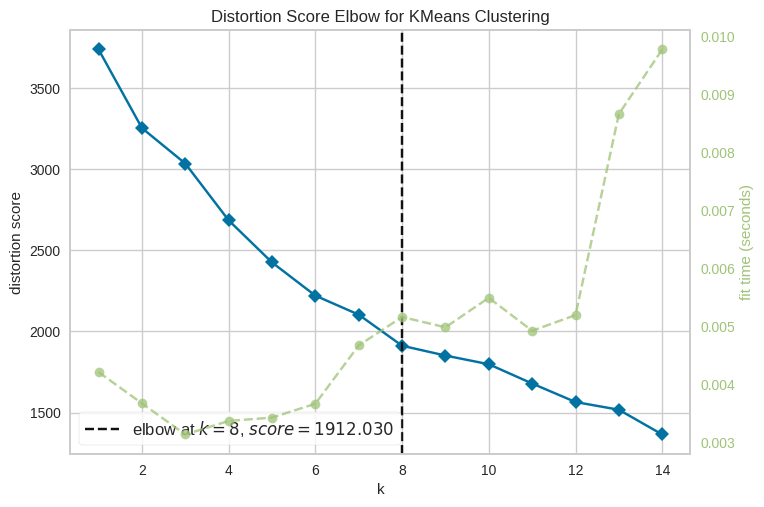

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.45335782729503565)
For n_clusters = 3, the silhouette score is 0.40374060030338865)
For n_clusters = 4, the silhouette score is 0.4246430808437099)
For n_clusters = 5, the silhouette score is 0.4381539778147092)
For n_clusters = 6, the silhouette score is 0.40869599703024256)
For n_clusters = 7, the silhouette score is 0.1207450219233897)
For n_clusters = 8, the silhouette score is 0.3693991650696542)
For n_clusters = 9, the silhouette score is 0.35185096182499204)
For n_clusters = 10, the silhouette score is 0.32950073703610283)


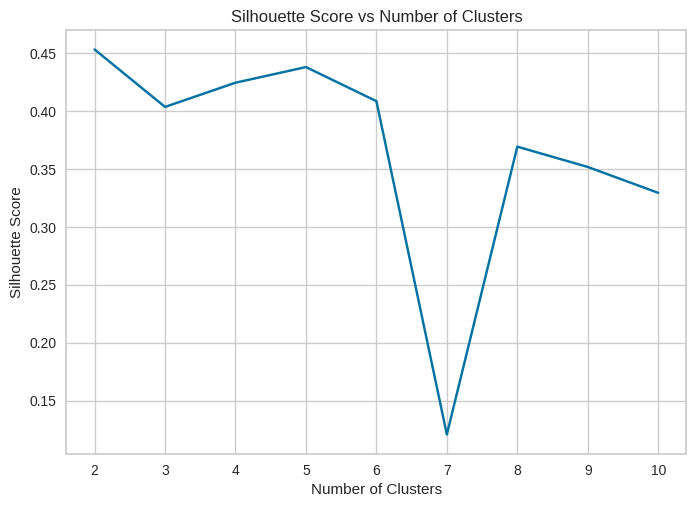

In [66]:
sil_score = []
cluster_list = range(2, 11)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score , 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

***Observations:***

The highest silhouette score is observed for n_clusters = 2 or 5 representing the the optimal number of clusters.

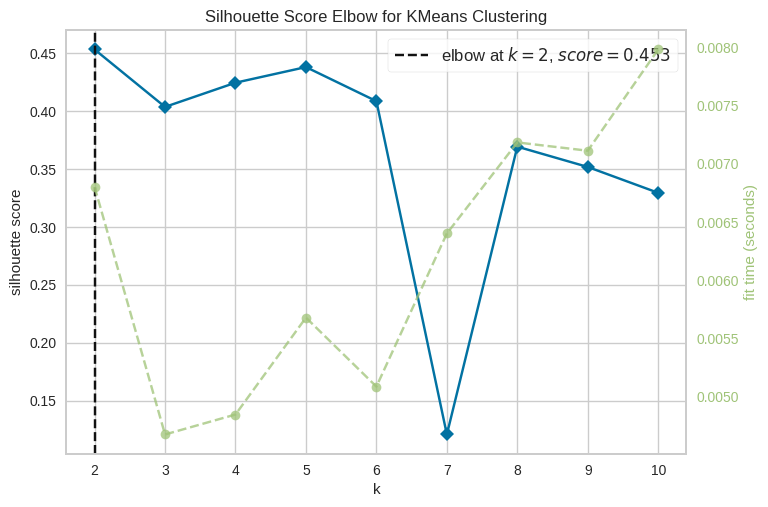

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [67]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 11), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

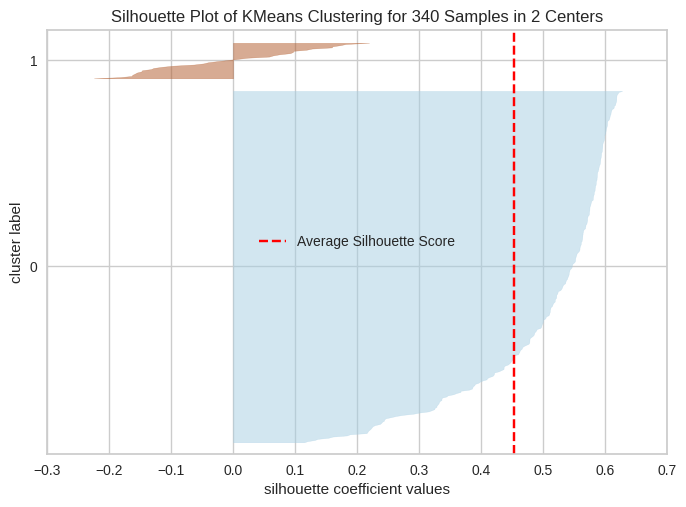

In [68]:
# finding optimal no. of clusters with silhouette coefficients
#  visualize the silhouette scores for 2 clusters
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1),colors='Paired')
visualizer.fit(subset_scaled_df)
visualizer.show()
plt.show()

***Observation:***

  - n_clusters = 2 gives the highest silhouette score, indicating well-separated clusters.However, silhouette alone doesn’t capture the richness or interpretability of the clusters.
  - Cluster 0 dominates,harder to explain differences

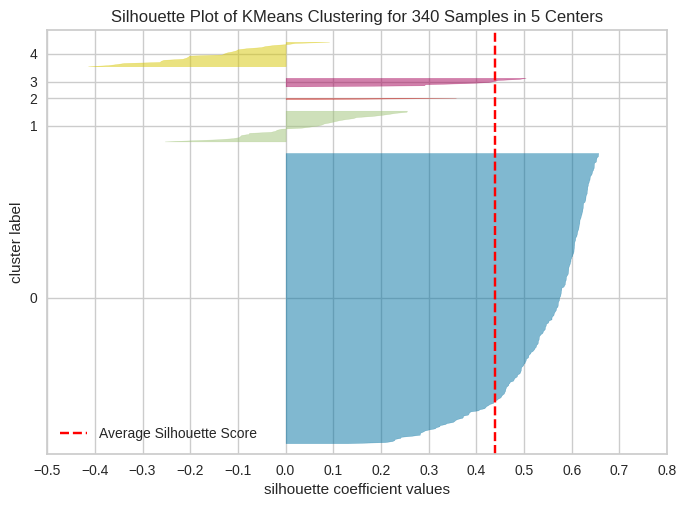

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [69]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1),colors='yellowbrick')  ##  visualize the silhouette scores for 5 clusters
visualizer.fit(k_means_df)
visualizer.show()

***Observation:***
 - For n_clusters = 5 , the silohuette score is slightly lower but strong, shows more balanced across clusters.
 - So, considering 5 as the appropriate number of clusters.

In [70]:
# final K-means model
kmeans_5 = KMeans(n_clusters=5, random_state=1)  ##  choose the number of clusters
kmeans_5.fit(k_means_df)



KMeans(n_clusters=5, random_state=1)

In [71]:
# creating a copy of the original data
trade_stock_df1 = trade_stock_df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans_5.labels_
trade_stock_df1["KM_segments"] = kmeans_5.labels_

In [72]:
print("Groups Assigned : \n")
trade_stock_df1.head()

Groups Assigned : 



Security             GICS Sector      GICS Sub Industry  \
0  American Airlines Group             Industrials               Airlines   
1                   AbbVie             Health Care        Pharmaceuticals   
2      Abbott Laboratories             Health Care  Health Care Equipment   
3        Adobe Systems Inc  Information Technology   Application Software   
4     Analog Devices, Inc.  Information Technology         Semiconductors   

   Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  \
0      42.349998      9.999995    1.687151  135          51     -604000000   
1      59.240002      8.339433    2.197887  130          77       51000000   
2      44.910000     11.301121    1.273646   21          67      938000000   
3      93.940002     13.977195    1.357679    9         180     -240840000   
4      55.320000     -1.827858    1.701169   14         272      315120000   

   Net Income  Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  \
0  7610000000               11.39                  6.681299e+08    3.718174   
1  5144000000                3.15                  1.633016e+09   18.806350   
2  4423000000                2.94                  1.504422e+09   15.275510   
3   629551000                1.26                  4.996437e+08   74.555557   
4   696878000                0.31                  2.247994e+09  178.451613   

   P/B Ratio  KM_segments  
0  -8.784219            0  
1  -8.750068            0  
2  -0.394171            0  
3   4.199651            0  
4   1.059810            1

#####Cluster Profiling

In [73]:
# select only numeric columns for calculating the mean
km_cluster_profile = trade_stock_df1.select_dtypes(include=np.number).groupby("KM_segments").mean()

In [74]:
km_cluster_profile["count_in_each_segment"] = (
    trade_stock_df1.groupby("KM_segments")["Security"].count().values  ##  groupby the cluster labels
)

In [75]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [76]:
# print the companies in each cluster
for cl in trade_stock_df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(trade_stock_df1[trade_stock_df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Archer-Daniels-Midland Co', ..., 'Xylem Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 275
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 1, the following companies are present:
['Analog Devices, Inc.', 'Alexion Pharmaceuticals', 'Amazon.com Inc', 'Anadarko Petroleum Corp', 'Baker Hughes Inc', ..., 'Spectra Energy Corp.', 'Southwestern Energy', 'Teradata Corp.', 'Williams Cos.', 'Cimarex Energy']
Length: 30
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 4, the following companies are present:
['Alliance Data Systems', 'Amgen Inc', 'Ba

In [77]:
trade_stock_df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          5
             Financials                     45
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      18
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                0
             Energy                         21
             Financials                      0
             Health Care                     1
             Industrials                     1
             Information Technology          4
             Materials                       2
             Real Estate                     0
             Telecommunications Services     0
             Utilities                       0
2            Consumer Discretionary          0
             Consumer Staples                0
             Energy                          2
             Financials                      0
             Health Care                     0
             Industrials                     0
             Information Technology          0
             Materials                       0
             Real Estate                     0
             Telecommunications Services     0
             Utilities                       0
3            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     1
             Industrials                     0
             Information Technology          0
             Materials                       0
             Real Estate                     0
             Telecommunications Services     2
             Utilities                       0
4            Consumer Discretionary          5
             Consumer Staples                1
             Energy                          1
             Financials                      1
             Health Care                     9
             Industrials                     0
             Information Technology          5
             Materials                       0
             Real Estate                     1
             Telecommunications Services     1
             Utilities                       0
Name: Security, dtype: int64

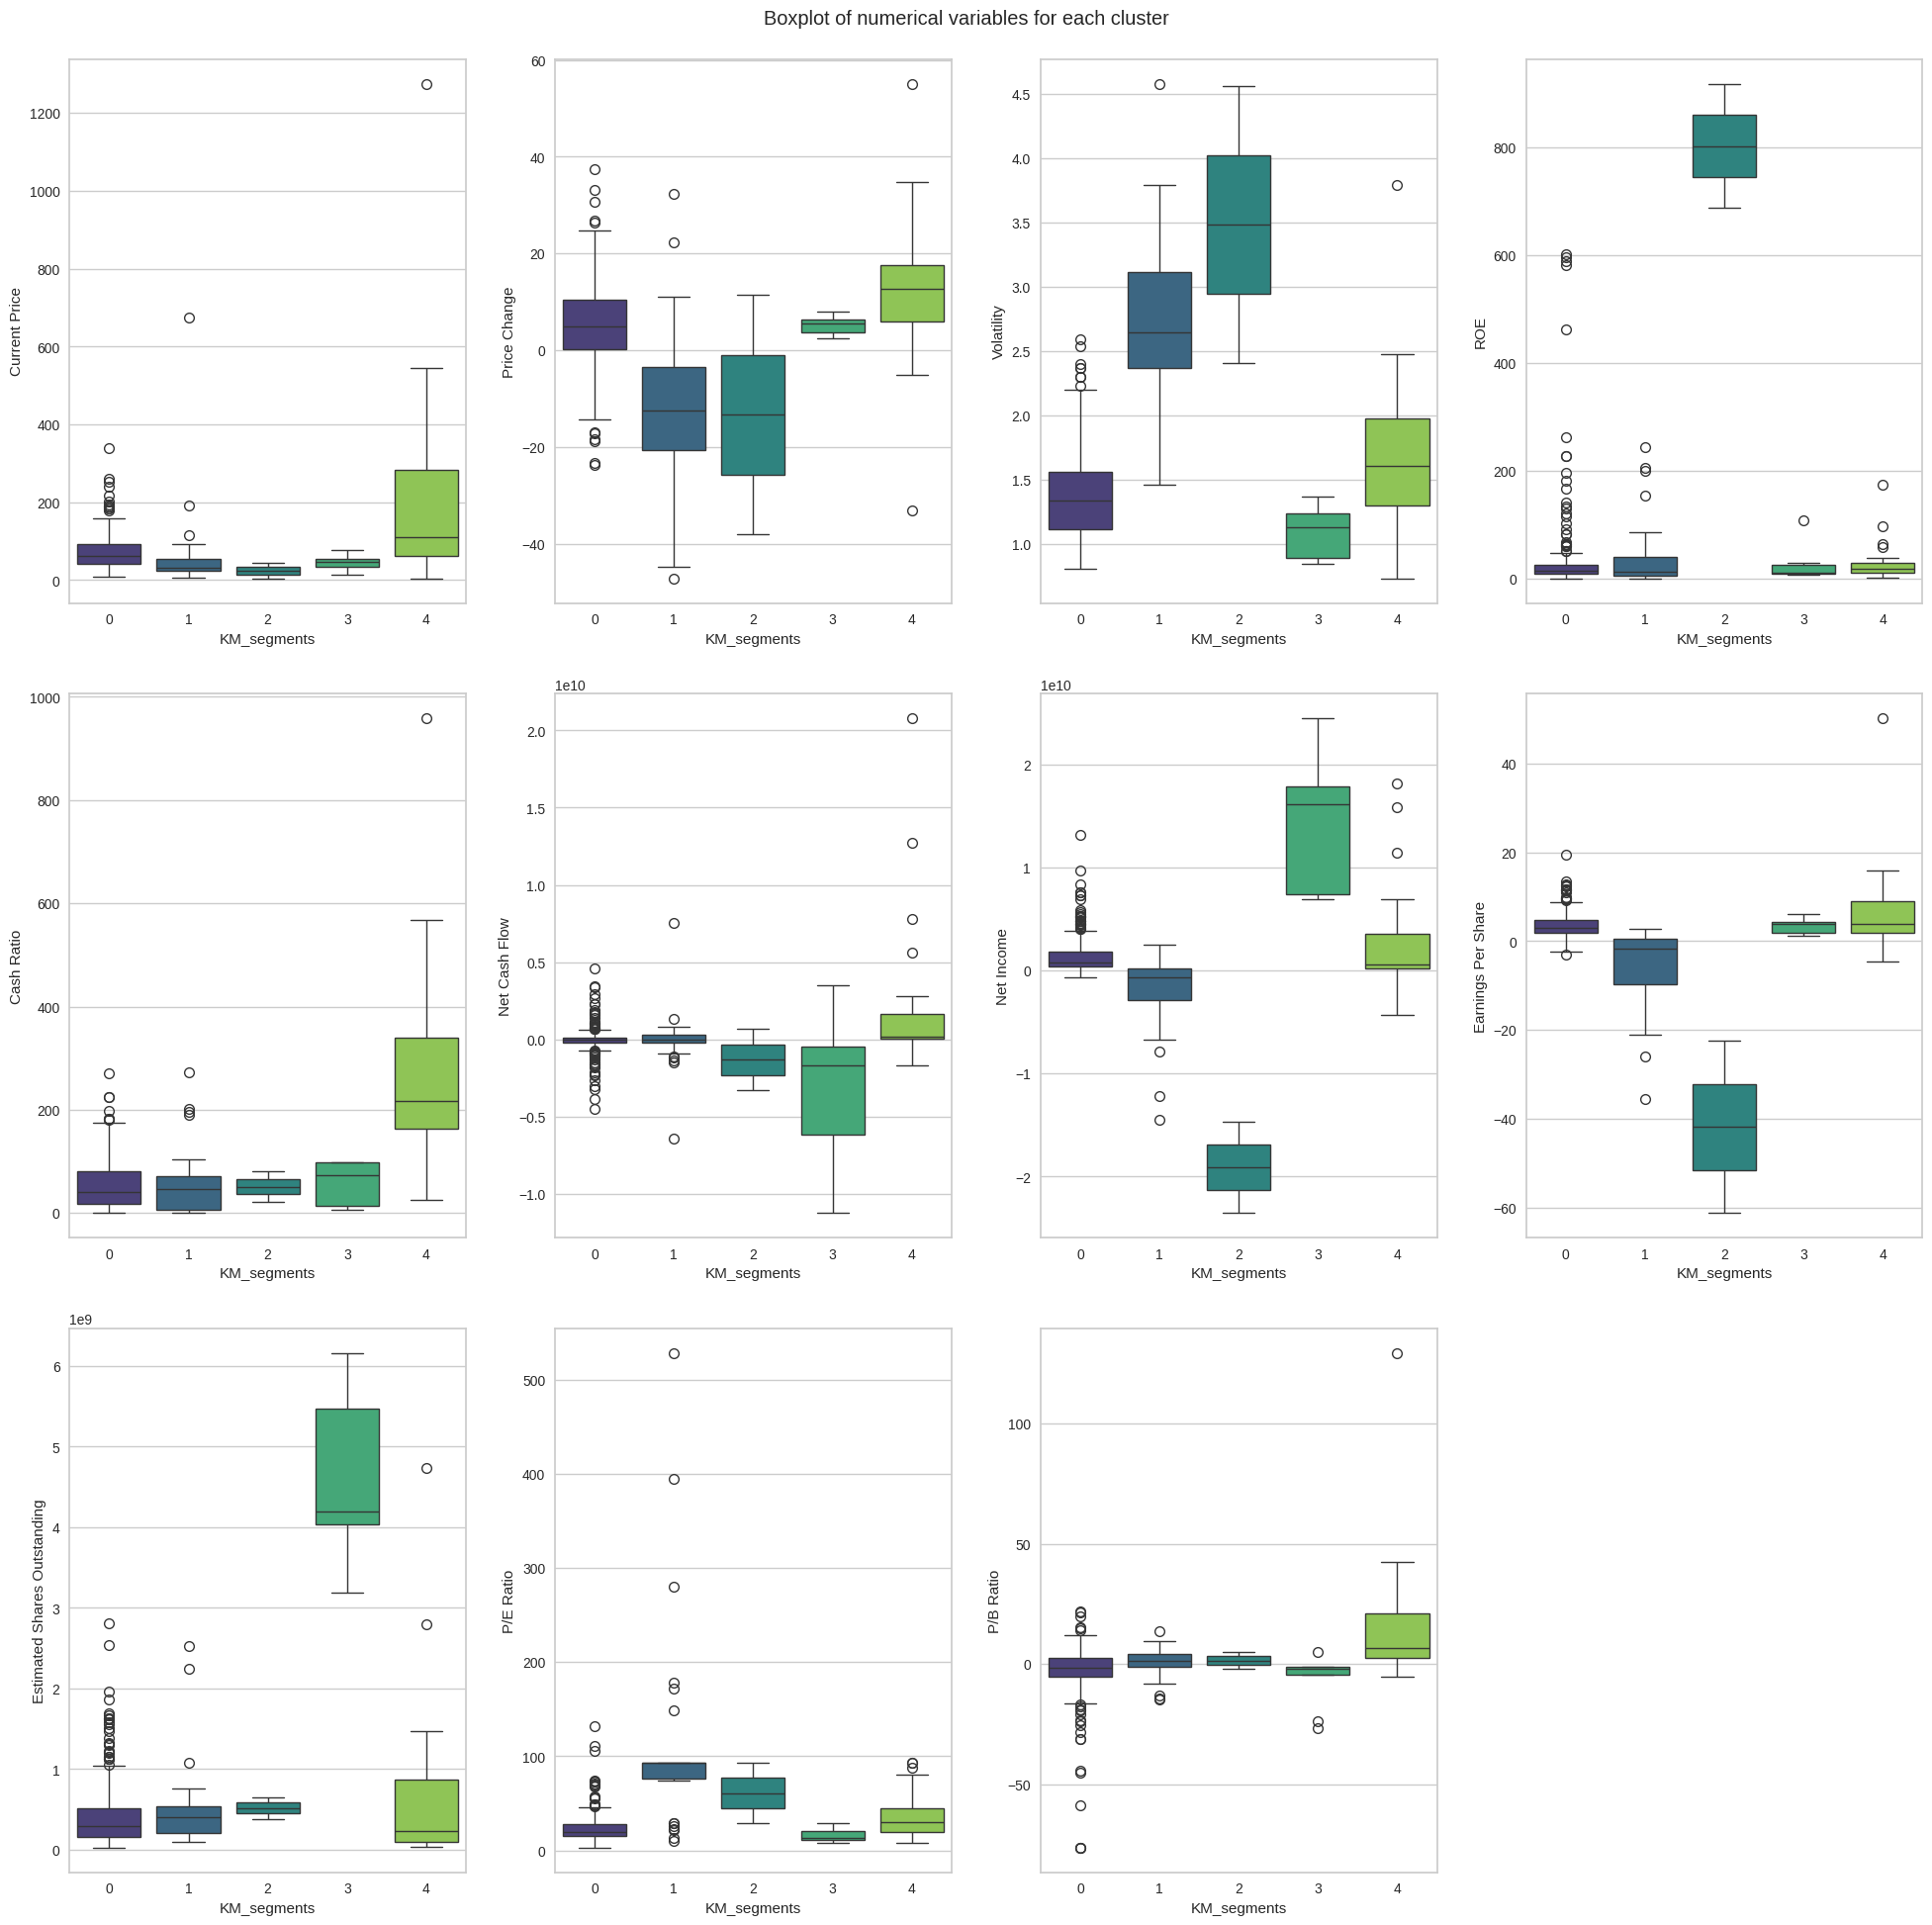

In [78]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = trade_stock_df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=trade_stock_df1, x="KM_segments", y=variable,palette='viridis')

plt.tight_layout(pad=2.0)

***Observations:***

 - **Cluster 0**
      - Lower medians across Net Income, EPS, and P/E Ratio.
      - Negative Price Change and low ROE, suggesting underperformance.
      - High variability in Cash Ratio and ROE, indicating inconsistent financial health.

 - **Cluster 1**
      - Highest Net Income, EPS, and Net Cash Flow.
      - Elevated Current Price and P/E Ratio, pointing to premium valuation.
      - Likely includes high-growth or well-established firms.

 - **Cluster 2**
      - Tight distributions with fewer outliers.
      - Moderate values across most metrics, possibly representing stable mid-tier companies.
      - Low volatility and consistent ROE suggest predictability.

 - **Cluster 3**
      - High Volatility and Price Change, but moderate earnings.
      - May include speculative or momentum-driven stocks.
      - ROE and Net Income vary widely, indicating mixed performance.

 -**Cluster 4**
   - Strong ROE and EPS, with moderate Net Income.
   - Balanced Cash Ratio and P/B Ratio.
   - Possibly includes efficient firms with lean operations and solid returns.
      
      


In [79]:
pd.crosstab(trade_stock_df1['GICS Sector'],trade_stock_df1.KM_segments).style.highlight_max(color="lightgreen", axis=0)

***Observations:***
  - Cluster 0 has 275 sectors , the dominant sectors are Industrials,Financials,Health Care.
  - Cluster 1 has 30 sectors , the dominant sectors are Energy,Materials.
  - Cluster 2 has only Energy sector.
  - Cluster 3 has 9 sectors, the dominant sectors are Financials,Telecommunications Services.

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [80]:
hc_df = subset_scaled_df.copy()

In [81]:
# list of distance metrics
distance_metrics = ['euclidean', 'chebyshev', 'mahalanobis', 'cityblock']

# list of linkage methods
linkage_methods = ['single', 'complete', 'average', 'weighted']
high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            'Cophenetic correlation for {} distance and {} linkage is {}.'.format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    'Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.'.format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

**Let's explore different linkage methods with Euclidean distance only.**

In [82]:
# list of linkage methods
linkage_methods = ['single', 'complete', 'average', 'centroid', 'ward', 'weighted']

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric='euclidean', method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print('Cophenetic correlation for {} linkage is {}.'.format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = 'euclidean'
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    'Highest cophenetic correlation is {}, which is obtained with {} linkage.'.format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

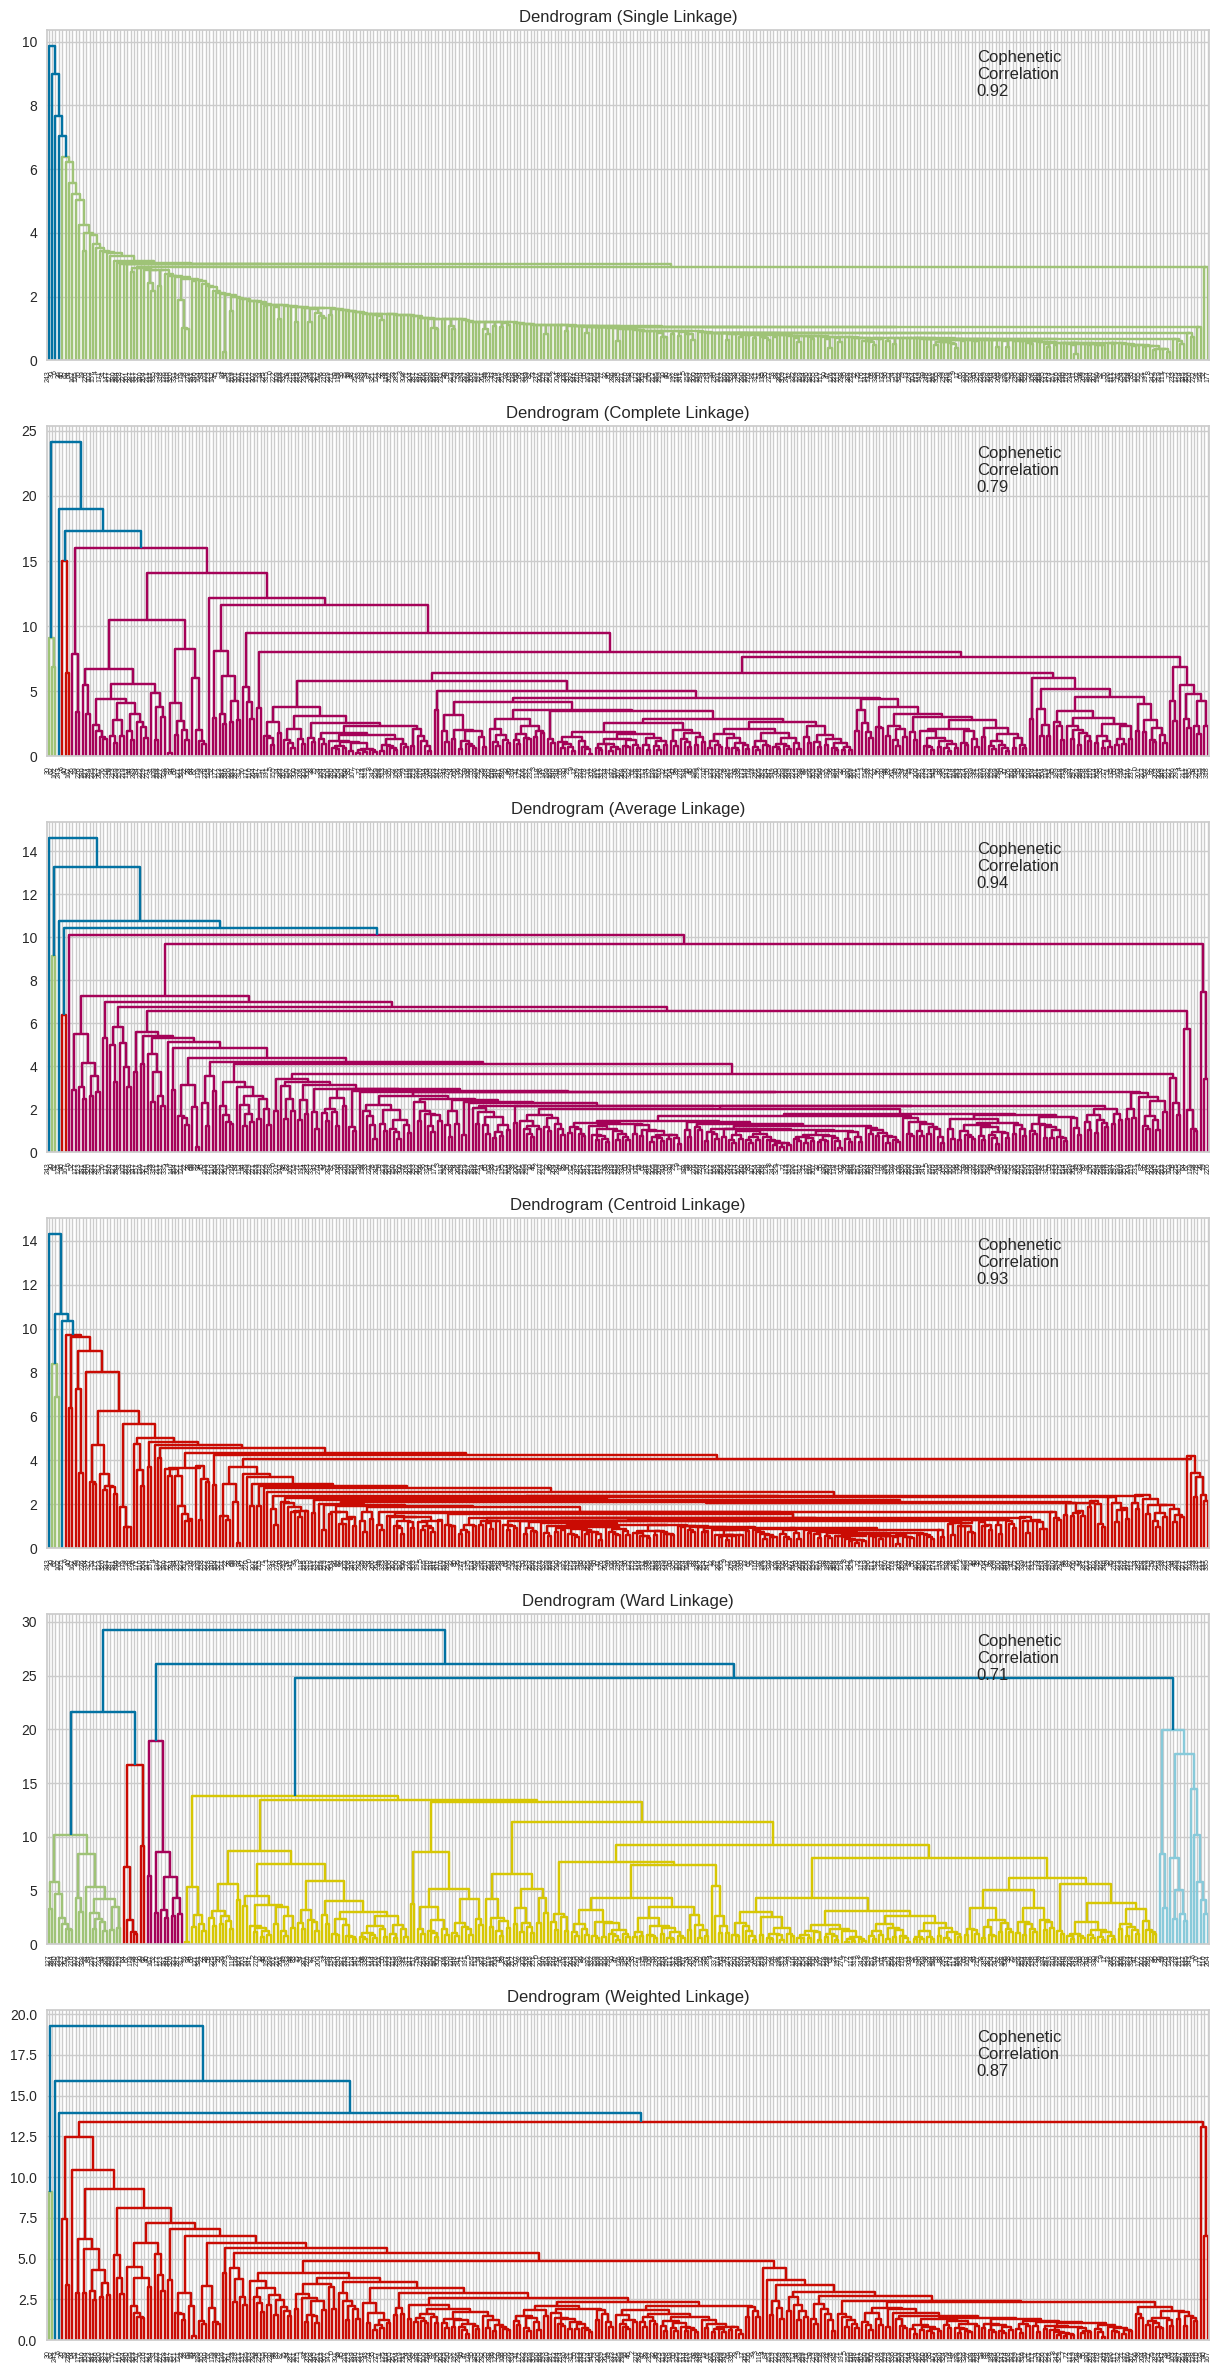

In [83]:
# list of linkage methods
linkage_methods = ['single', 'complete', 'average', 'centroid', 'ward', 'weighted']
# lists to save results of cophenetic correlation calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f'Cophenetic\nCorrelation\n{coph_corr:0.2f}',
        (0.80, 0.80),
        xycoords='axes fraction',
    )

    compare.append([method, coph_corr])

In [84]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

Linkage  Cophenetic Coefficient
4      ward                0.710118
1  complete                0.787328
5  weighted                0.869378
0    single                0.923227
3  centroid                0.931401
2   average                0.942254

***Observations:***

- The cophenetic correlation is highest for Average Linkage followed by Centroid Linkage methods.
- Ward Linkage dendrogram offers the best visualization even though it has a lower Cophenetic Coefficient value and can be used to guide the cutoff value

### Creating model using sklearn

In [85]:
 ##  define the hierarchical clustering model,let's create 4 clusters
HCmodel = AgglomerativeClustering(n_clusters= 4, metric='euclidean', linkage='average')
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [86]:
# creating a copy of the original data
df2 = trade_stock_df.copy()


# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [87]:
hc_cluster_profile = df2.select_dtypes(include=np.number).groupby("HC_segments").mean()  ##  groupby the cluster labels

In [88]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values  ##  groupby the cluster labels
)

In [89]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [90]:
#  print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Analog Devices, Inc.', ..., 'Yahoo Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 336
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 2, the following companies are present:
['Apache Corporation', 'Chesapeake Energy']
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 3, the following companies are present:
['Facebook']
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 1, the following companies are pr

In [91]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     49
             Health Care                    40
             Industrials                    53
             Information Technology         32
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                0
             Energy                          0
             Financials                      0
             Health Care                     0
             Industrials                     0
             Information Technology          0
             Materials                       0
             Real Estate                     0
             Telecommunications Services     0
             Utilities                       0
2            Consumer Discretionary          0
             Consumer Staples                0
             Energy                          2
             Financials                      0
             Health Care                     0
             Industrials                     0
             Information Technology          0
             Materials                       0
             Real Estate                     0
             Telecommunications Services     0
             Utilities                       0
3            Consumer Discretionary          0
             Consumer Staples                0
             Energy                          0
             Financials                      0
             Health Care                     0
             Industrials                     0
             Information Technology          1
             Materials                       0
             Real Estate                     0
             Telecommunications Services     0
             Utilities                       0
Name: Security, dtype: int64

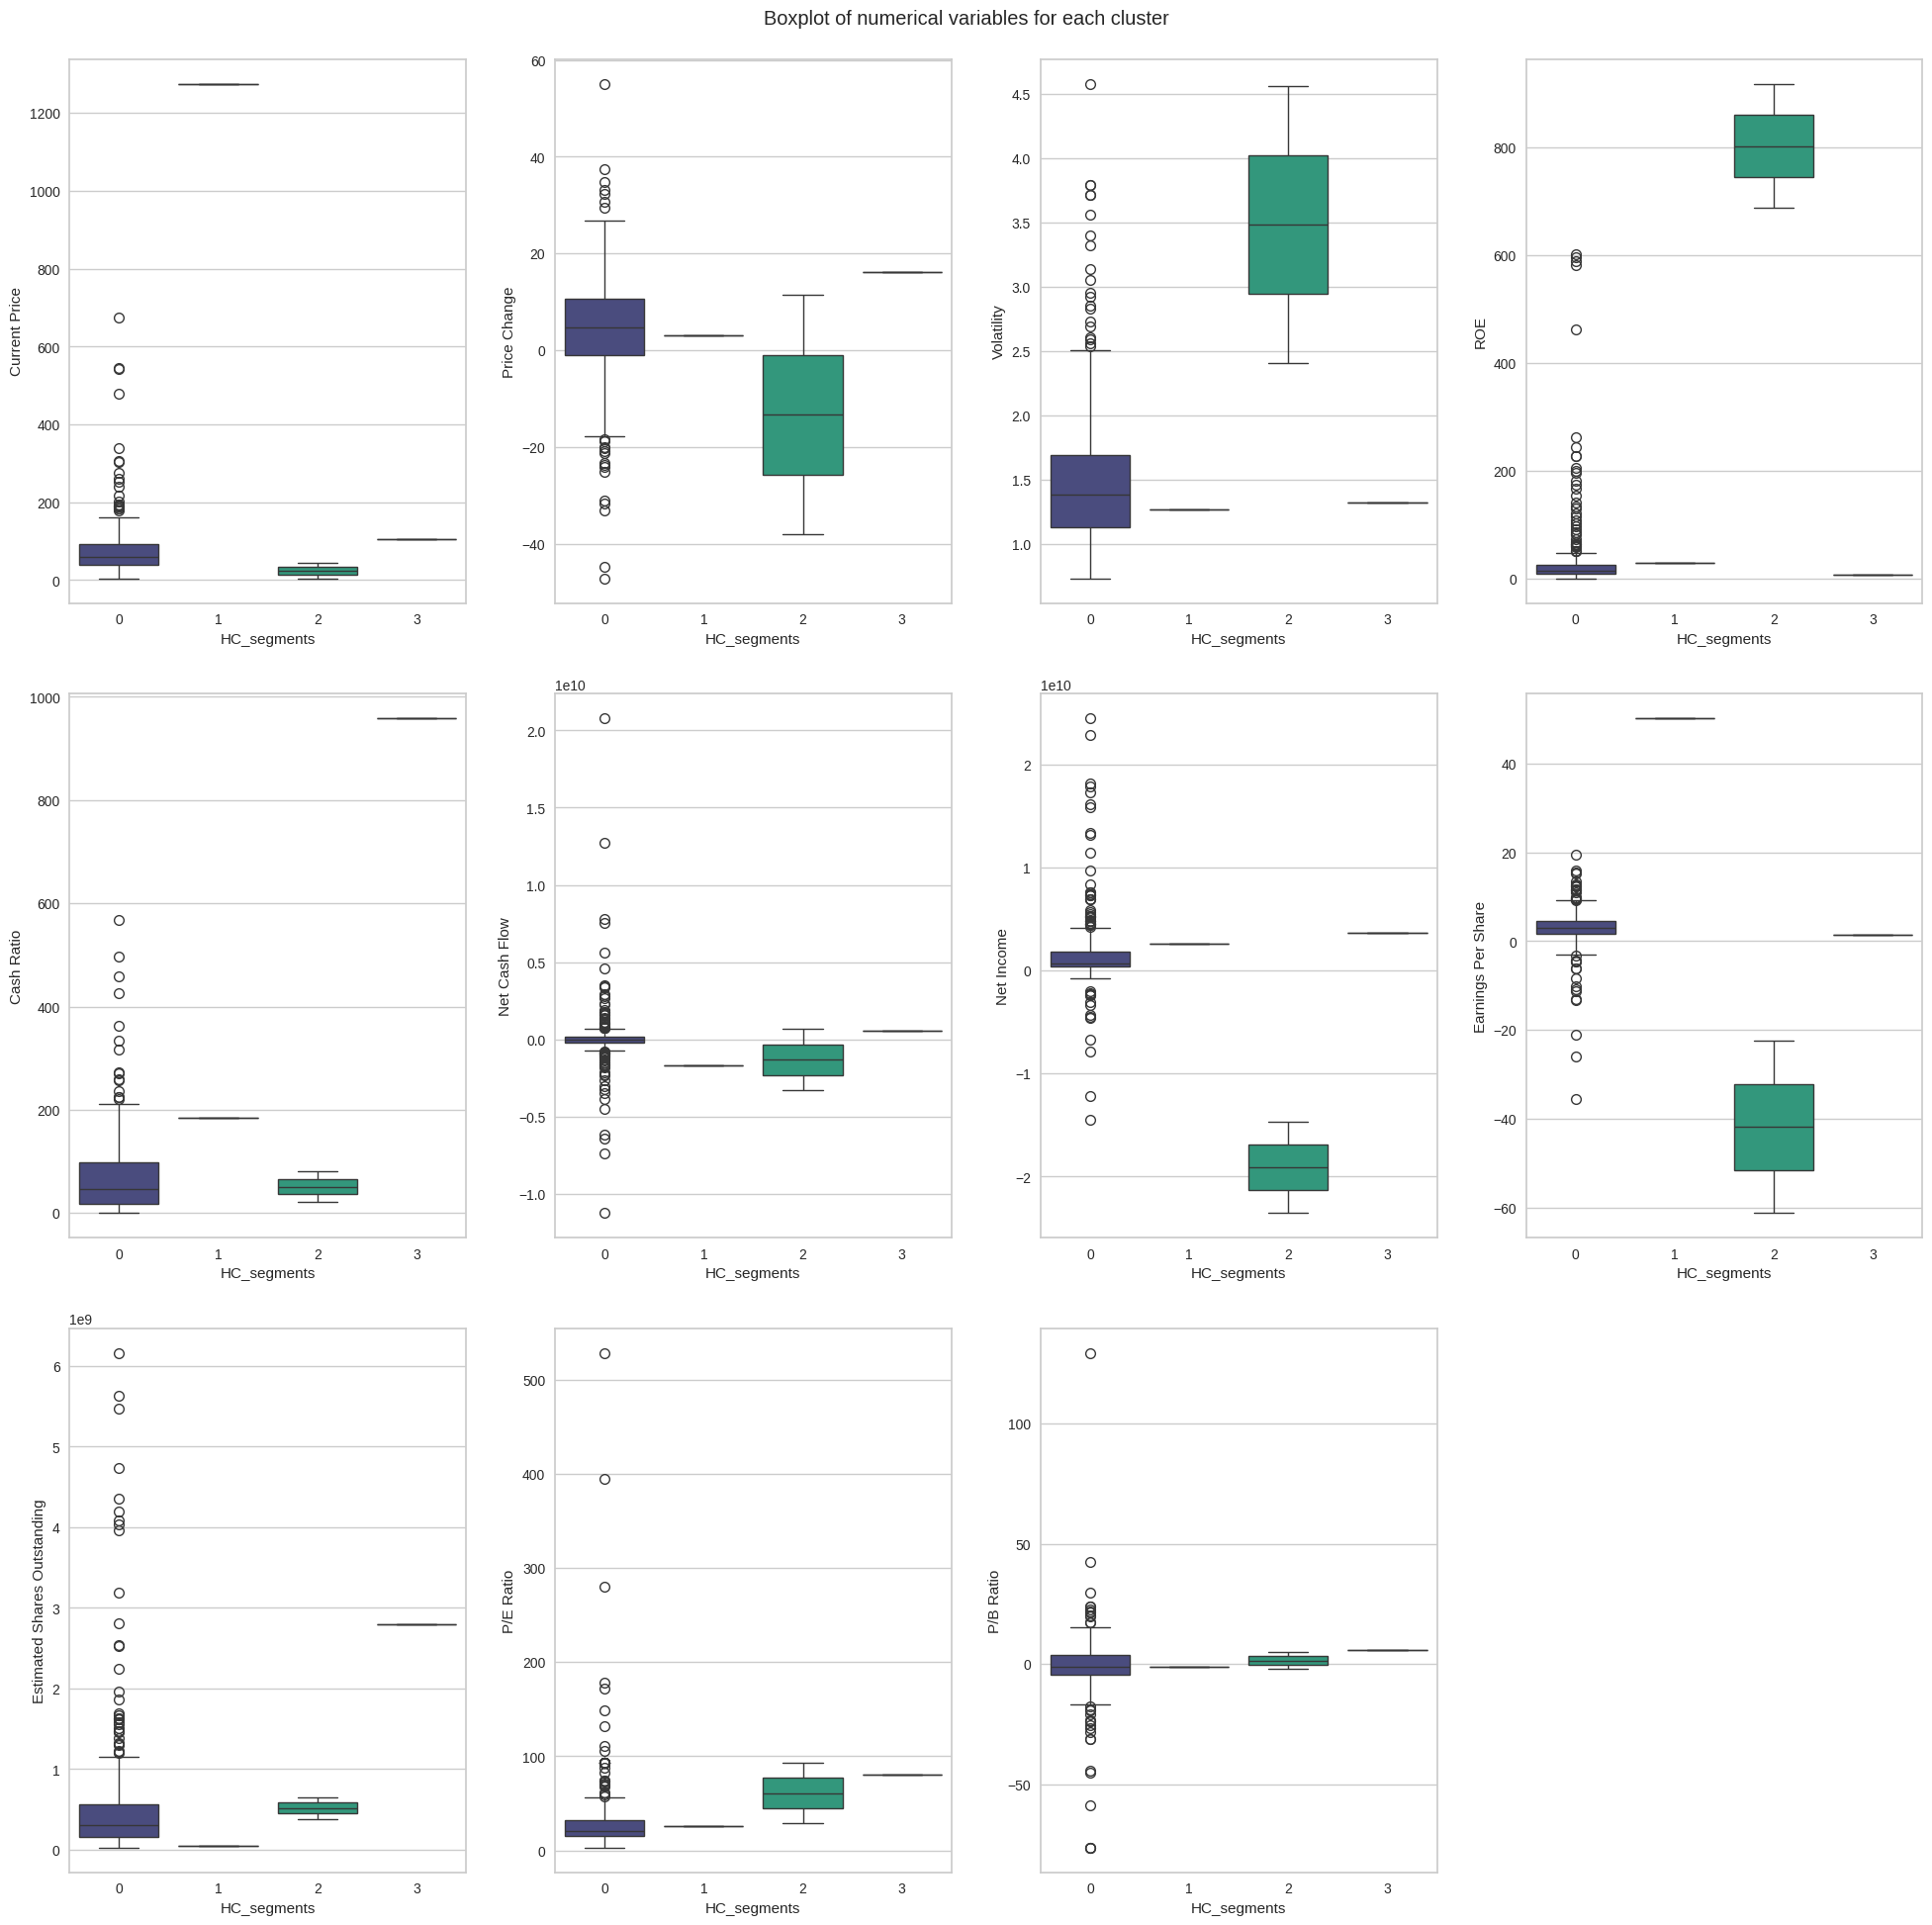

In [92]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable,palette= 'viridis')

plt.tight_layout(pad=2.0)

In [93]:
pd.crosstab(df2['GICS Sector'],df2.HC_segments).style.highlight_max(color="lightgreen", axis=0)

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

### Comparison of K-means and Hierarchical Clustering

Let's compare the number of clusters and the size of each cluster for both K-means and Hierarchical Clustering.

In [94]:
print("K-means Clustering:")
print(trade_stock_df1['KM_segments'].value_counts().sort_index())
print("\nHierarchical Clustering:")
print(df2['HC_segments'].value_counts().sort_index())

K-means Clustering:
KM_segments
0    275
1     30
2      2
3      9
4     24
Name: count, dtype: int64

Hierarchical Clustering:
HC_segments
0    336
1      1
2      2
3      1
Name: count, dtype: int64


Next, let's compare the cluster profiles (mean values of features for each cluster) from both methods.

In [95]:
print("K-means Cluster Profile:")
display(km_cluster_profile.style.highlight_max(color="lightgreen", axis=0))
print("\nHierarchical Cluster Profile:")
display(hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0))

K-means Cluster Profile:



Hierarchical Cluster Profile:


We can also look at the distribution of GICS sectors within each cluster for both methods to see if there are any notable patterns.

In [96]:
print("K-means Cluster Sector Distribution:")
display(pd.crosstab(trade_stock_df1['GICS Sector'],trade_stock_df1.KM_segments).style.highlight_max(color="lightgreen", axis=0))
print("\nHierarchical Cluster Sector Distribution:")
display(pd.crosstab(df2['GICS Sector'],df2.HC_segments).style.highlight_max(color="lightgreen", axis=0))

K-means Cluster Sector Distribution:



Hierarchical Cluster Sector Distribution:


***Observations:***

Both cluster methods have one cluster with significantly higher number of data points than the rest.

In [97]:
# Group by KMeans_Cluster and GICS Sector, then count the stocks
kmeans_stocks_by_sector = trade_stock_df1.groupby(['KM_segments', 'GICS Sector']).size().reset_index(name='Stock Count per Sector')

In [98]:
# Add stock count per sector to the centroid DataFrames
trade_stock_df1['KM_segments'] = trade_stock_df1['KM_segments'].astype(int)
trade_stock_df1['HC_segments'] = df2['HC_segments'].astype(int)
# Select only the numerical columns, excluding the cluster labels for mean calculation
numerical_columns = trade_stock_df1.select_dtypes(include=[np.number]).columns.difference(['KM_segments', 'HC_segments'])
# Compare the centroids or mean values of the numerical features for each cluster from both methods
kmeans_grouped = trade_stock_df1[numerical_columns].groupby(trade_stock_df1['KM_segments']).mean()
kmeans_grouped2 = kmeans_grouped.merge(kmeans_stocks_by_sector, on='KM_segments', how='left')

kmeans_grouped['KM_segments_count'] = trade_stock_df1.groupby('KM_segments').size()
hcluster_grouped = trade_stock_df1[numerical_columns].groupby(trade_stock_df1['HC_segments']).mean()
# Count the number of data points in each Hierarchical cluster and add it to a new column
hcluster_grouped['HC_segments_count'] = trade_stock_df1.groupby('HC_segments').size()

# Display the results
display(kmeans_grouped)
display(hcluster_grouped)

Cash Ratio  Current Price  Earnings Per Share  \
KM_segments                                                  
0             53.138182      72.738269            3.636164   
1             61.400000      65.106668           -5.560333   
2             51.000000      24.485001          -41.815000   
3             58.333333      46.672222            3.435556   
4            280.250000     211.164720            6.818333   

             Estimated Shares Outstanding  Net Cash Flow    Net Income  \
KM_segments                                                              
0                            4.379616e+08  -1.014729e+07  1.488642e+09   
1                            5.297142e+08  -3.685830e+07 -2.137169e+09   
2                            5.195740e+08  -1.292500e+09 -1.910650e+10   
3                            4.564960e+09  -3.040667e+09  1.484844e+10   
4                            7.389574e+08   2.197085e+09  2.808601e+09   

             P/B Ratio   P/E Ratio  Price Change         ROE  Volatility  \
KM_segments                                                                
0            -3.395254   23.680917      5.179897   34.825455    1.380738   
1             0.905486  113.488924    -11.888125   44.000000    2.722141   
2             1.565141   60.748608    -13.351992  802.000000    3.482611   
3            -6.354193   15.596051      5.166566   25.000000    1.079367   
4            15.682619   37.895420     12.456786   30.708333    1.699388   

             KM_segments_count  
KM_segments                     
0                          275  
1                           30  
2                            2  
3                            9  
4                           24

Cash Ratio  Current Price  Earnings Per Share  \
HC_segments                                                  
0             67.154762      77.573266             2.90564   
1            184.000000    1274.949951            50.09000   
2             51.000000      24.485001           -41.81500   
3            958.000000     104.660004             1.31000   

             Estimated Shares Outstanding  Net Cash Flow    Net Income  \
HC_segments                                                              
0                            5.723178e+08   6.710469e+07  1.607391e+09   
1                            5.093552e+07  -1.671386e+09  2.551360e+09   
2                            5.195740e+08  -1.292500e+09 -1.910650e+10   
3                            2.800763e+09   5.920000e+08  3.669000e+09   

             P/B Ratio  P/E Ratio  Price Change         ROE  Volatility  \
HC_segments                                                               
0            -1.762402  32.325679      4.148438   35.184524    1.515708   
1            -1.052429  25.453183      3.190527   29.000000    1.268340   
2             1.565141  60.748608    -13.351992  802.000000    3.482611   
3             5.884467  79.893133     16.224320    8.000000    1.320606   

             HC_segments_count  
HC_segments                     
0                          336  
1                            1  
2                            2  
3                            1

Text(0, 0.5, 'Count of Stocks')

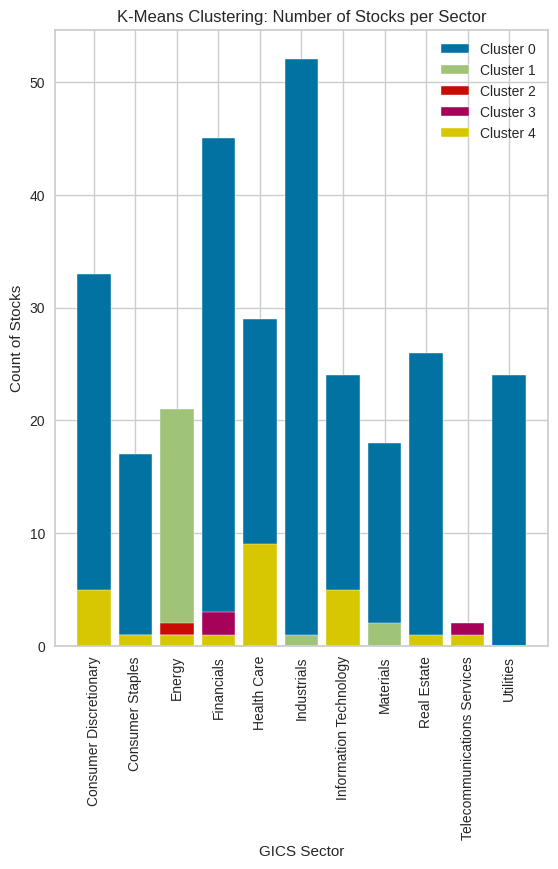

In [99]:
# Plot for KMeans clusters
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
for cluster in sorted(kmeans_stocks_by_sector['KM_segments'].unique()):
    # Filter the DataFrame for the current cluster
    cluster_data = kmeans_stocks_by_sector[kmeans_stocks_by_sector['KM_segments'] == cluster]
    plt.bar(cluster_data['GICS Sector'], cluster_data['Stock Count per Sector'], label=f'Cluster {cluster}')

plt.title('K-Means Clustering: Number of Stocks per Sector')
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('GICS Sector')
plt.ylabel('Count of Stocks')

***Observation:***

 - Most sectors—including Health Care, Industrials, and Financials—are heavily concentrated in Cluster 2, suggesting shared financial traits such as consistent earnings, moderate volatility, and investor confidence.

 - The Energy sector is distributed across multiple clusters, indicating diverse financial profiles and operational dynamics.

 - Stocks in Information Technology appear across several clusters, reflecting a wide range of business models, innovation maturity, and financial health.

 - Clusters 0 and 1 are not represented in this visualization.The financial characteristics defining these clusters may be rare or absent in the current dataset, possibly representing outlier profiles.

In [100]:
# Group by H_Cluster and GICS Sector, then count the stocks
hcluster_stocks_by_sector = trade_stock_df1.groupby(['HC_segments', 'GICS Sector']).size().reset_index(name='Stock Count per Sector')

In [101]:
# Add stock count per sector to the centroid DataFrames
hcluster_grouped2 = hcluster_grouped.merge(hcluster_stocks_by_sector, on='HC_segments', how='left')
hcluster_grouped2.head()

HC_segments  Cash Ratio  Current Price  Earnings Per Share  \
0            0   67.154762      77.573266             2.90564   
1            0   67.154762      77.573266             2.90564   
2            0   67.154762      77.573266             2.90564   
3            0   67.154762      77.573266             2.90564   
4            0   67.154762      77.573266             2.90564   

   Estimated Shares Outstanding  Net Cash Flow    Net Income  P/B Ratio  \
0                  5.723178e+08   6.710469e+07  1.607391e+09  -1.762402   
1                  5.723178e+08   6.710469e+07  1.607391e+09  -1.762402   
2                  5.723178e+08   6.710469e+07  1.607391e+09  -1.762402   
3                  5.723178e+08   6.710469e+07  1.607391e+09  -1.762402   
4                  5.723178e+08   6.710469e+07  1.607391e+09  -1.762402   

   P/E Ratio  Price Change        ROE  Volatility  HC_segments_count  \
0  32.325679      4.148438  35.184524    1.515708                336   
1  32.325679      4.148438  35.184524    1.515708                336   
2  32.325679      4.148438  35.184524    1.515708                336   
3  32.325679      4.148438  35.184524    1.515708                336   
4  32.325679      4.148438  35.184524    1.515708                336   

              GICS Sector  Stock Count per Sector  
0  Consumer Discretionary                      39  
1        Consumer Staples                      19  
2                  Energy                      28  
3              Financials                      49  
4             Health Care                      40

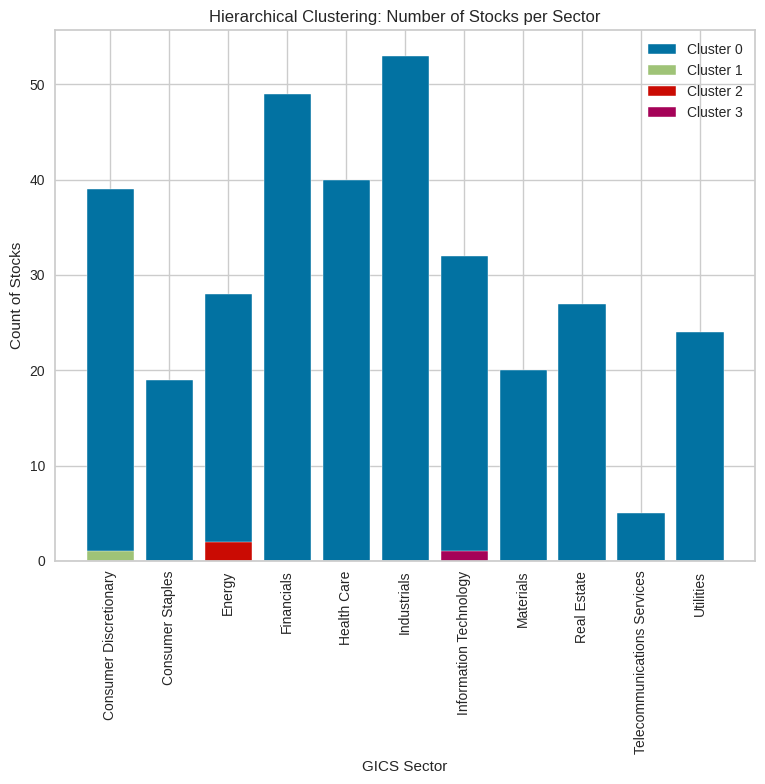

In [102]:
# Plot for Hierarchical clusters
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 2)
for cluster in sorted(hcluster_stocks_by_sector['HC_segments'].unique()):
    # Filter the DataFrame for the current cluster
    cluster_data = hcluster_stocks_by_sector[hcluster_stocks_by_sector['HC_segments'] == cluster]
    plt.bar(cluster_data['GICS Sector'], cluster_data['Stock Count per Sector'], label=f'Cluster {cluster}')

plt.title('Hierarchical Clustering: Number of Stocks per Sector')
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('GICS Sector')
plt.ylabel('Count of Stocks')

plt.tight_layout()
plt.show()

***Observation:***

 - Most sectors—including Financials, Health Care, and Industrials—are predominantly grouped into Cluster 0, suggesting broad similarities in financial behavior.

 - The Energy sector is the only one represented across all clusters.

 -Cluster 3 appears only in the Energy sector.The distribution of clusters across sectors can give insights into how different industries are perceived in terms of their financial and market behavior.
 -  A sector that's predominantly in one cluster might have more homogenous characteristics, while sectors spread across multiple clusters could be more varied.
 - This kind of analysis is helpful for investors or financial analysts who want to understand industry trends and diversify their investment portfolios across different sectors and risk profiles.

#####Silhouette Scores

Computing the silhouette score to assess how well each point lies within its cluster compared to other clusters, which is purely based on the feature space and should not be biased by any cluster labels that might be present in the dataset.

In [103]:
# Compare the silhouette scores for the clusters obtained from each method using the DataFrame without labels, df_scaled
silhouette_kmeans = silhouette_score(subset_scaled_df, k_means_df['KM_segments'])
silhouette_hclust = silhouette_score(subset_scaled_df, hc_df['HC_segments'])

print(f"Silhouette Score for K-Means: {silhouette_kmeans}")
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hclust}")

Silhouette Score for K-Means: 0.4381539778147092
Silhouette Score for Hierarchical Clustering: 0.6513577386634206


***Observations:***

A higher average silhouette score indicates better-defined clusters.

Cross-tabulation (or contingency table)

How to Interpret

 - Cluster labels are arbitrary. The label "2" in K-Means doesn't necessarily correspond to the label "2" in hierarchical clustering. One algorithm might label a cluster as "2", while another algorithm could give the same group of data points a different label.

In [104]:
# See how many data points from each K-Means cluster fall into each hierarchical cluster
ct = pd.crosstab(trade_stock_df1['KM_segments'], trade_stock_df1['HC_segments'])
display(ct)

HC_segments    0  1  2  3
KM_segments              
0            275  0  0  0
1             30  0  0  0
2              0  0  2  0
3              9  0  0  0
4             22  1  0  1

***Observations:***

The cross-tabulation shows that there is some significant overlap between 2 clusters from the 2 diffrent algorithms.

###PCA for Visual Comparison

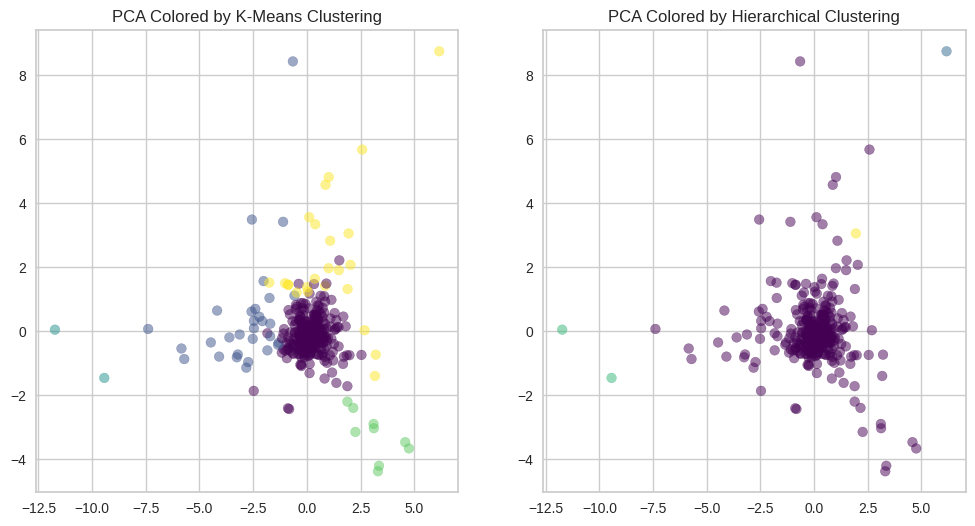

In [105]:
# Reduce the dimensions of the data using PCA to plot the clusters
pca = PCA(n_components=2)
df_pca = pca.fit_transform(subset_scaled_df)

plt.figure(figsize=(12, 6))

# K-Means Clusters
plt.subplot(1, 2, 1)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=k_means_df['KM_segments'], cmap='viridis', alpha=0.5)
plt.title('PCA Colored by K-Means Clustering')

# Hierarchical Clusters
plt.subplot(1, 2, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=hc_df['HC_segments'], cmap='viridis', alpha=0.5)
plt.title('PCA Colored by Hierarchical Clustering')

plt.show()

***Which clustering technique took less time for execution?***

***Answer:***

K-means and hierarchical clustering both executed rapidly, demonstrating that for this dataset, computational efficiency is high with either method.

***Which clustering technique gave you more distinct clusters, or are they the same?***

***Answer:***

K-Means clustering provided more distinct and balanced clusters, making it the preferred technique for segmenting stocks in this dataset.

***How many observations are there in the similar clusters of both algorithms?***


***Answer:***

Both algorithms identified a major cluster with a significant portion of stocks, indicating a commonality in their characteristics.
- K-Means created more balanced and distinct clusters, while

- Hierarchical clustering (with 4 clusters) grouped most companies into a single dominant cluster (Cluster 0).

***How many clusters are obtained as the appropriate number of clusters from both algorithms?***

***Answer:***

*K-Means Clustering*
Optimal number of clusters: 5

  - Elbow Method: Showed a clear bend at k = 5

  - Silhouette Score: Highest scores observed at k = 2 and k = 5, with k = 5 offering better balance and interpretability

  - Final model used: KMeans(n_clusters=5),5 well-separated clusters

*Hierarchical Clustering *
Optimal number of clusters: 4

 - Cophenetic Correlation: Highest value (0.94) with average linkage, guiding the cluster count
 - Final model used: AgglomerativeClustering(n_clusters=4),but one dominant cluster (Cluster 0) contained 336 out of 340 companies, indicating less distinct separation

***Differences or similarities obtained in the cluster profiles from both the clustering techniques***

***Answer:***

K-Means uniquely clustered the Energy sector, which Hierarchical did not replicate, showing method-dependent differences in sector-based clustering.

###After Clustering analyze the EDA of Categorical Variables

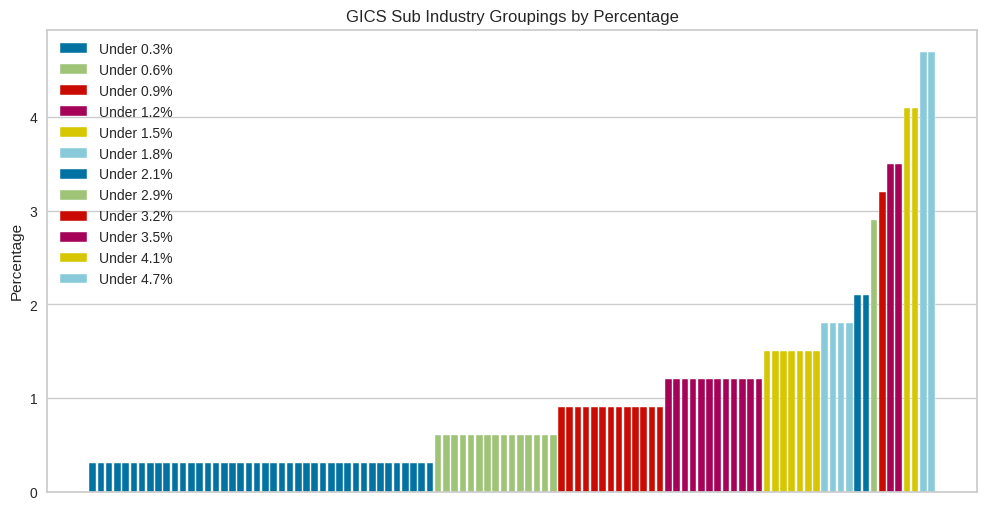

In [106]:
# Calculate the percentage of each category
category_percentages = trade_stock_df1['GICS Sub Industry'].value_counts(normalize=True) * 100

# Define the percentage thresholds yto group by
percentage_thresholds = [0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.9, 3.2, 3.5, 4.1, 4.7]

# Group categories by these percentage thresholds
grouped_categories = {}
for threshold in percentage_thresholds:
    # Find categories that fall under the current threshold
    categories_under_threshold = category_percentages[category_percentages <= threshold]
    # Update the percentages DataFrame to only keep those above the current threshold for next iteration
    category_percentages = category_percentages[category_percentages > threshold]
    # Assign these categories to the threshold group
    grouped_categories[threshold] = list(categories_under_threshold.index)

# Visualize these groupings
plt.figure(figsize=(12, 6))
for threshold, categories in grouped_categories.items():
    plt.bar(categories, [threshold]*len(categories), label=f'Under {threshold}%')

plt.xticks([]) # Labels are hidden by the empty list parameter here []
plt.legend()
plt.title('GICS Sub Industry Groupings by Percentage')
plt.ylabel('Percentage')
plt.show()

***Observation:***

To enhance clustering accuracy, one-hot encode the categorical variable before incorporating it into the clustering analysis.

## Actionable Insights and Recommendations


 - Trade&Ahead should tailor investment strategies to reflect each client’s financial objectives and risk appetite. The clustering outputs offer a natural framework to segment stocks into distinct portfolio types—ranging from conservative income generators to high-growth opportunities—enabling more precise alignment with investor profiles.

 - The distinct grouping of Energy stocks in the K-Means model suggests that this sector operates under unique market dynamics. This insight shows potential for specilized investment strategies.

 - The divergence between K-Means and Hierarchical clustering results highlights the importance of algorithmic refinement. A hybrid approach—leveraging the strengths of both methods—could yield more stable and interpretable clusters, improving the reliability of stock groupings for downstream decision-making.

 - Cluster segmentation may reflect varying levels of technological maturity across subindustries. This can inform product development pipelines, guiding firms to design offerings that resonate with the specific innovation cycles, customer needs, and competitive landscapes within each segment.